<a href="https://colab.research.google.com/github/ngyoozheng-2025/Organ-C-Codefest-Hackathon/blob/main/OrganC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving Walmart_Sales.csv to Walmart_Sales (2).csv


{'Walmart_Sales (2).csv': b'Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment\r\n1,05-02-2010,1643690.9,0,42.31,2.572,211.0963582,8.106\r\n1,12-02-2010,1641957.44,1,38.51,2.548,211.2421698,8.106\r\n1,19-02-2010,1611968.17,0,39.93,2.514,211.2891429,8.106\r\n1,26-02-2010,1409727.59,0,46.63,2.561,211.3196429,8.106\r\n1,05-03-2010,1554806.68,0,46.5,2.625,211.3501429,8.106\r\n1,12-03-2010,1439541.59,0,57.79,2.667,211.3806429,8.106\r\n1,19-03-2010,1472515.79,0,54.58,2.72,211.215635,8.106\r\n1,26-03-2010,1404429.92,0,51.45,2.732,211.0180424,8.106\r\n1,02-04-2010,1594968.28,0,62.27,2.719,210.8204499,7.808\r\n1,09-04-2010,1545418.53,0,65.86,2.77,210.6228574,7.808\r\n1,16-04-2010,1466058.28,0,66.32,2.808,210.4887,7.808\r\n1,23-04-2010,1391256.12,0,64.84,2.795,210.4391228,7.808\r\n1,30-04-2010,1425100.71,0,67.41,2.78,210.3895456,7.808\r\n1,07-05-2010,1603955.12,0,72.55,2.835,210.3399684,7.808\r\n1,14-05-2010,1494251.5,0,74.78,2.854,210.3374261,7.808\r\n1,21-05-2010,1399

In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import joblib
import shap
import os

In [4]:
# Install necessary libraries
!pip install prophet scikit-learn pandas numpy matplotlib joblib

In [5]:
df = pd.read_csv("Walmart_Sales.csv", parse_dates=['Date'], dayfirst=True)

# Drop unnamed index column if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

print("Data shape:", df.shape)
print(df.columns)
df.head()

Data shape: (6435, 8)
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

/tmp/ipython-input-3313560966.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()


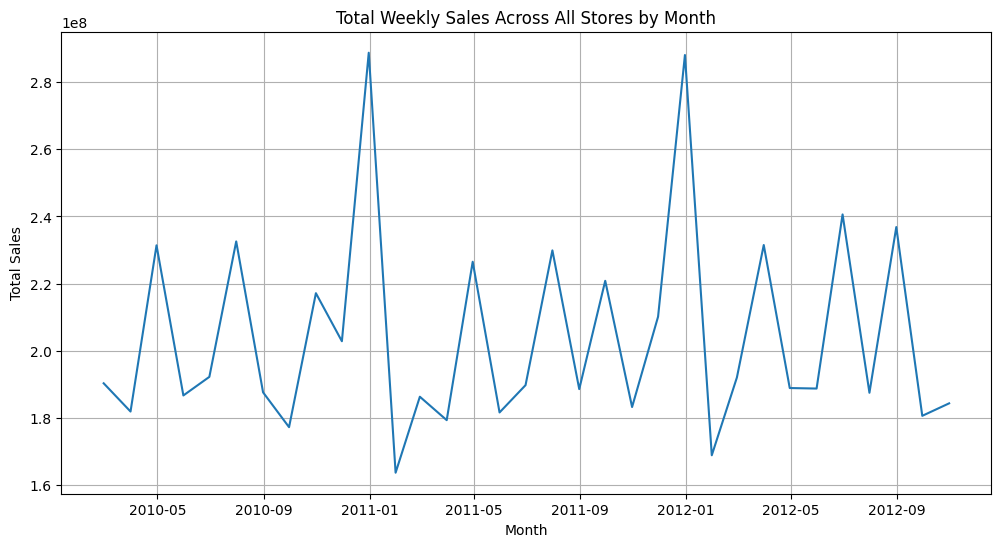

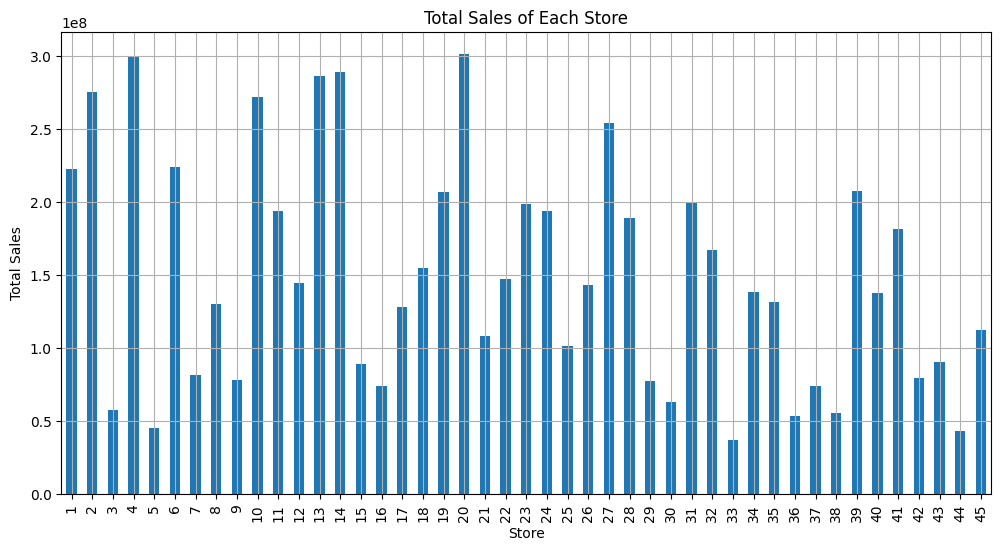

/tmp/ipython-input-3313560966.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = data.groupby(pd.Grouper(key="Date", freq="M"))["Weekly_Sales"].sum()


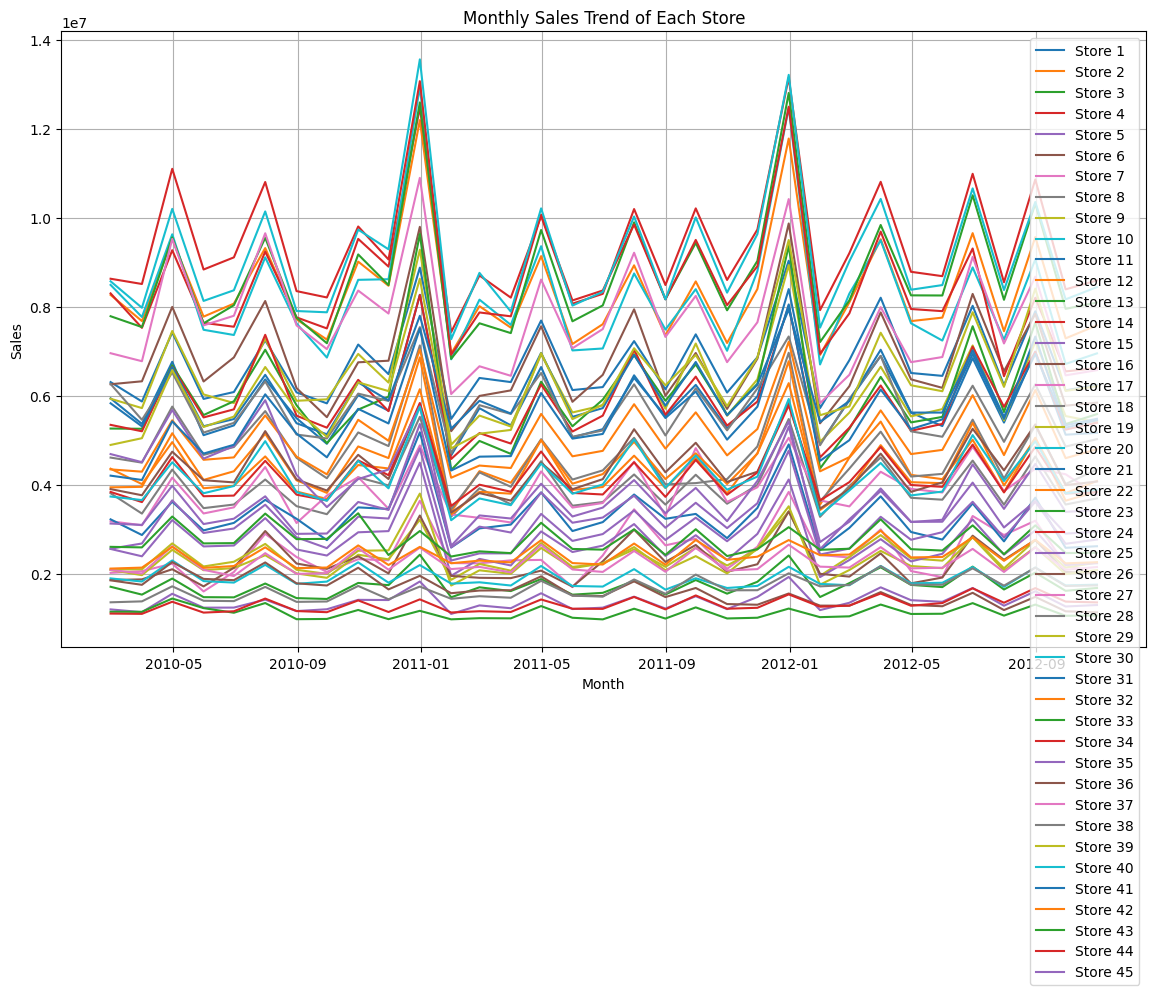

/tmp/ipython-input-3313560966.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_feat = df.groupby(pd.Grouper(key='Date', freq='M'))[col].mean()
/tmp/ipython-input-3313560966.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].mean()


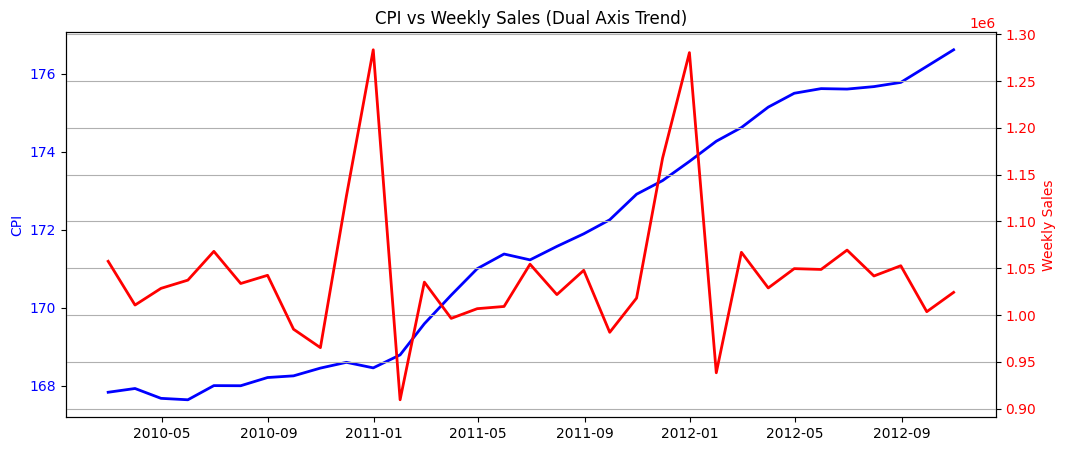

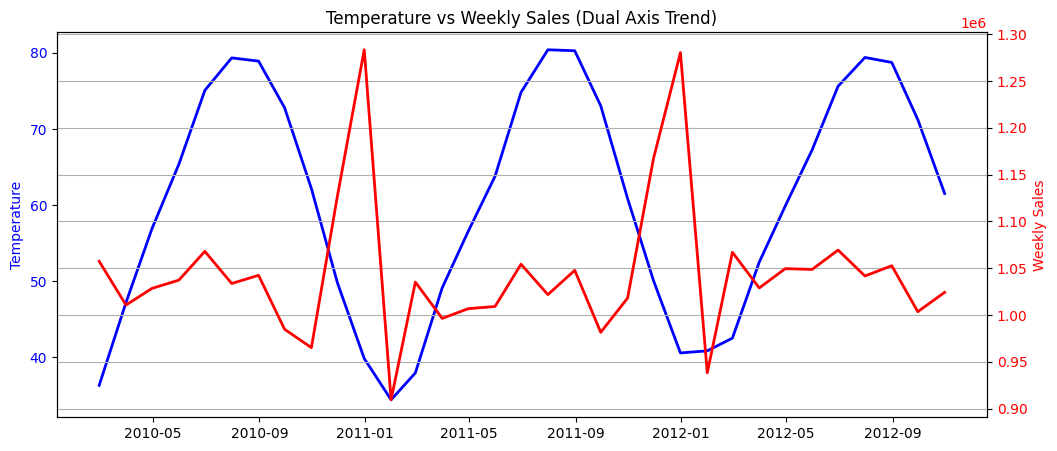

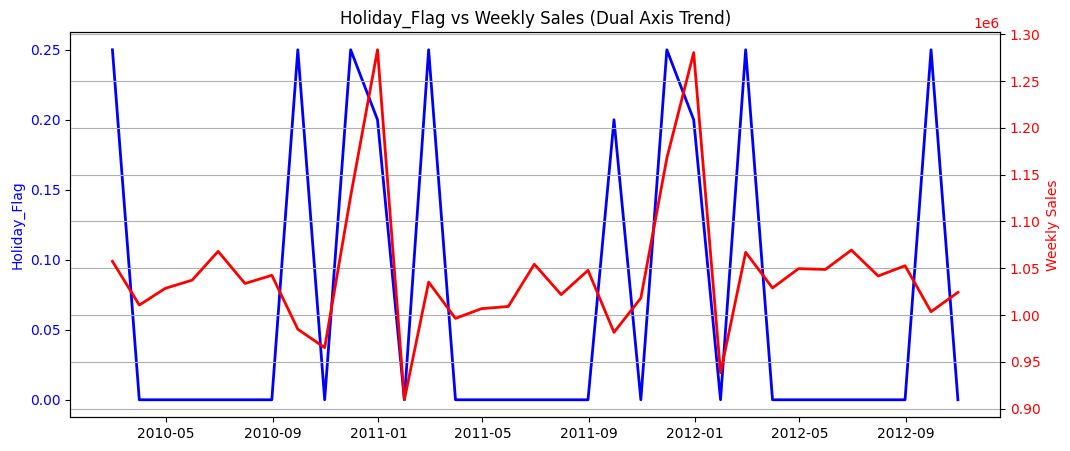

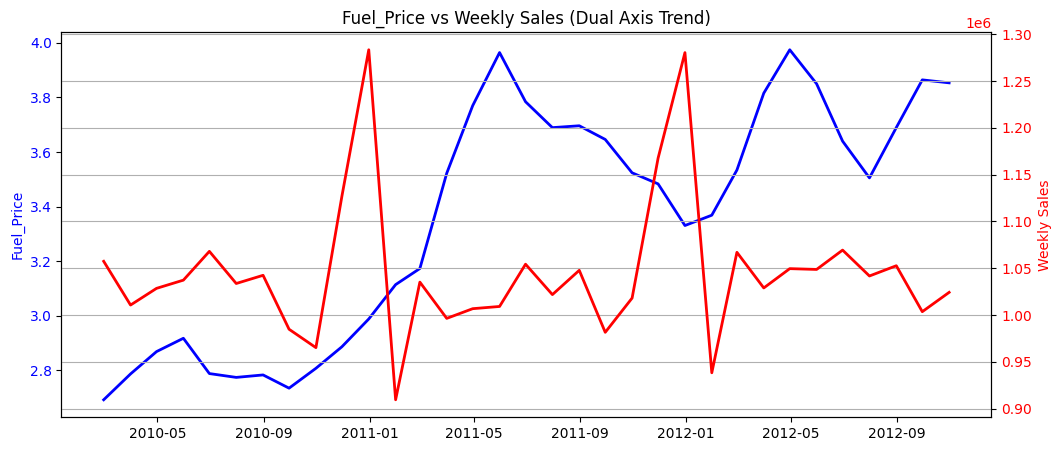

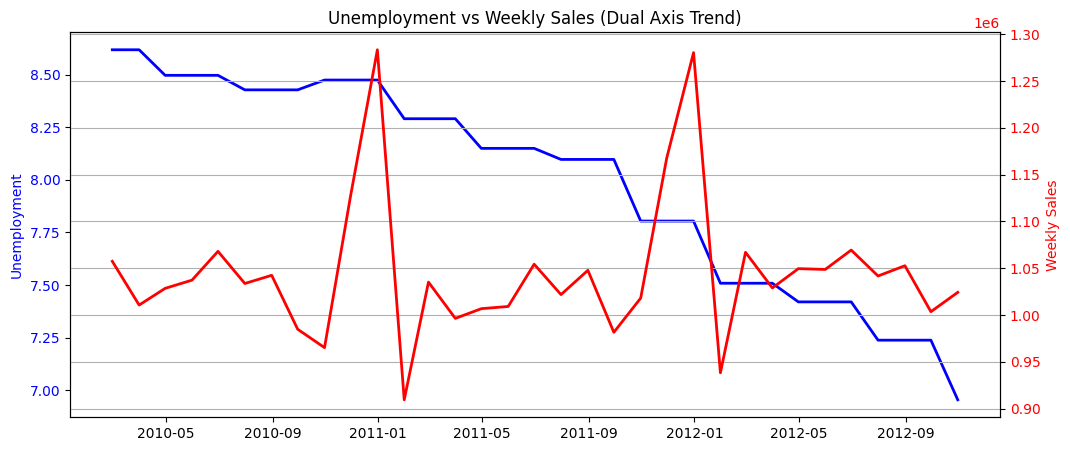

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 1



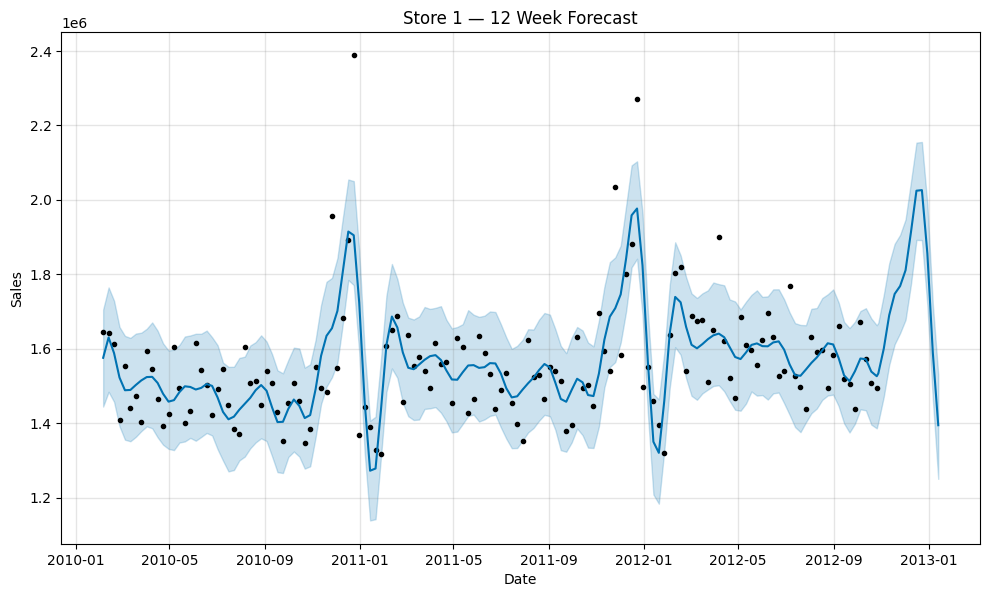

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 2



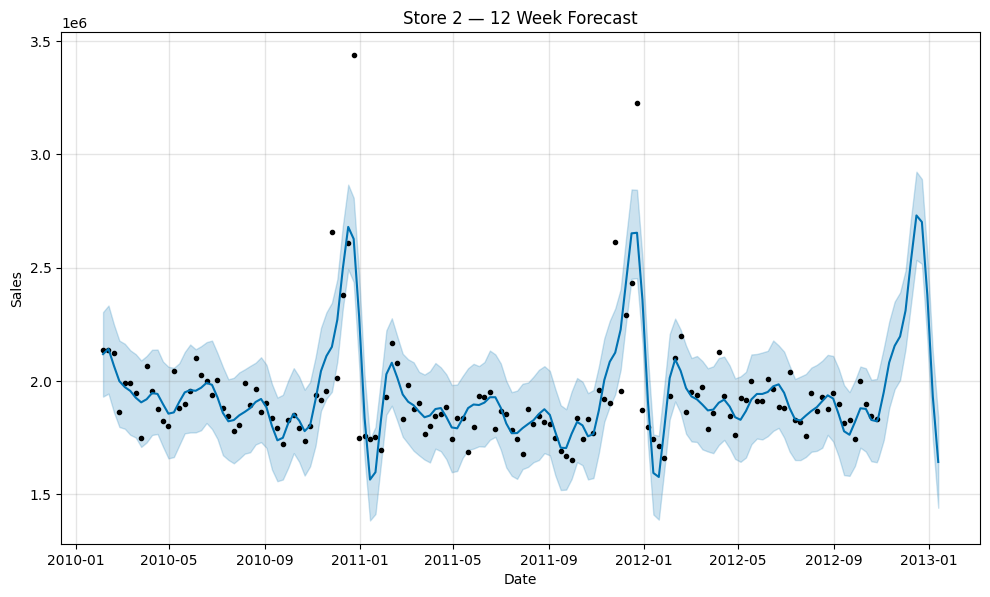

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 3



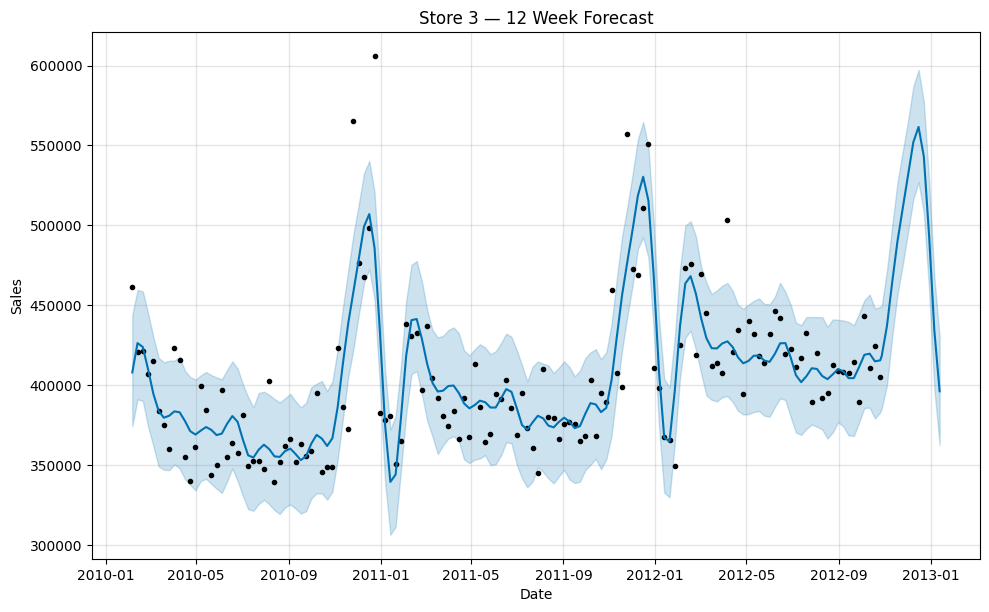

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 4



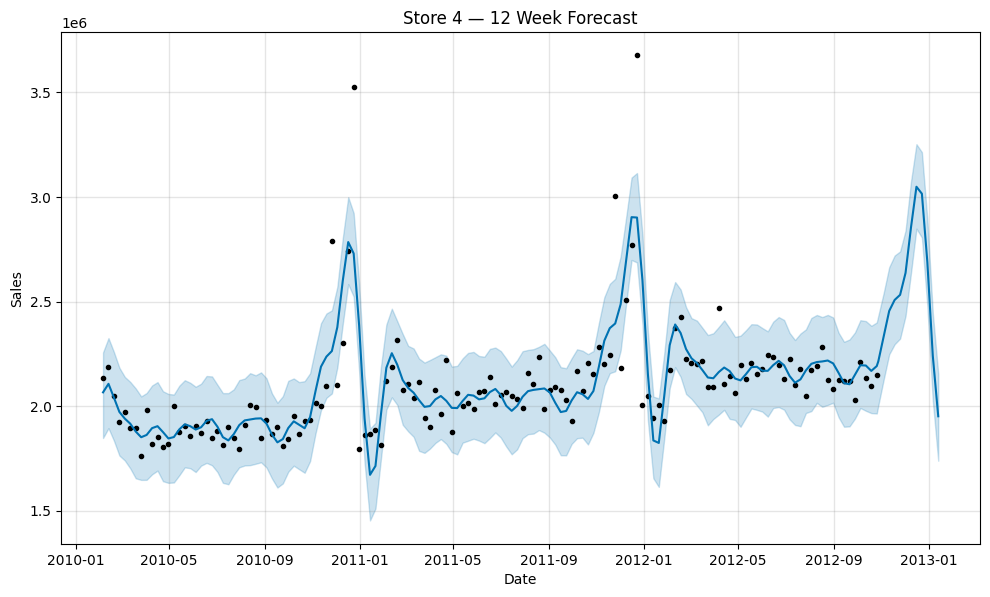

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 5



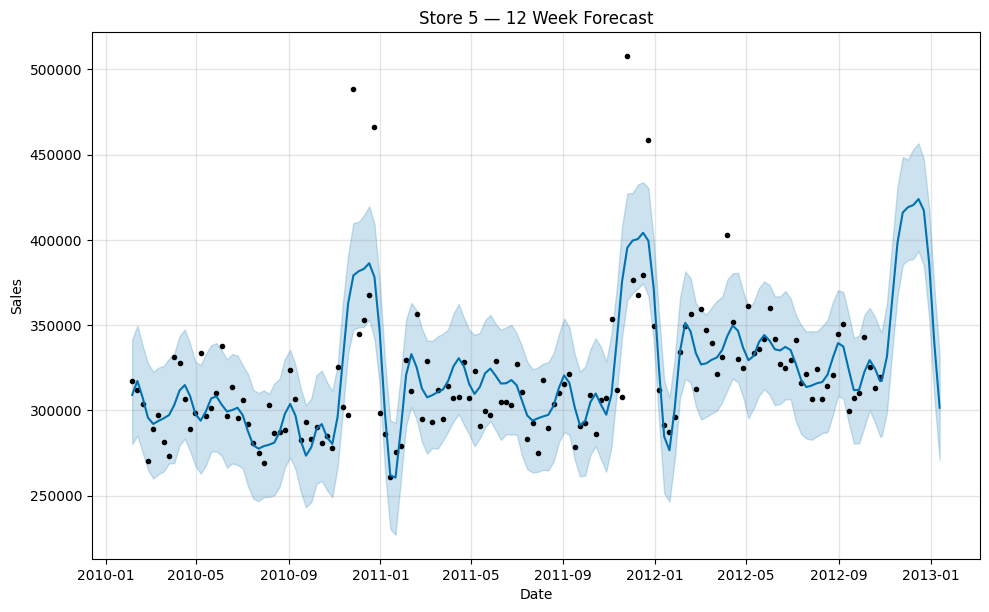

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 6



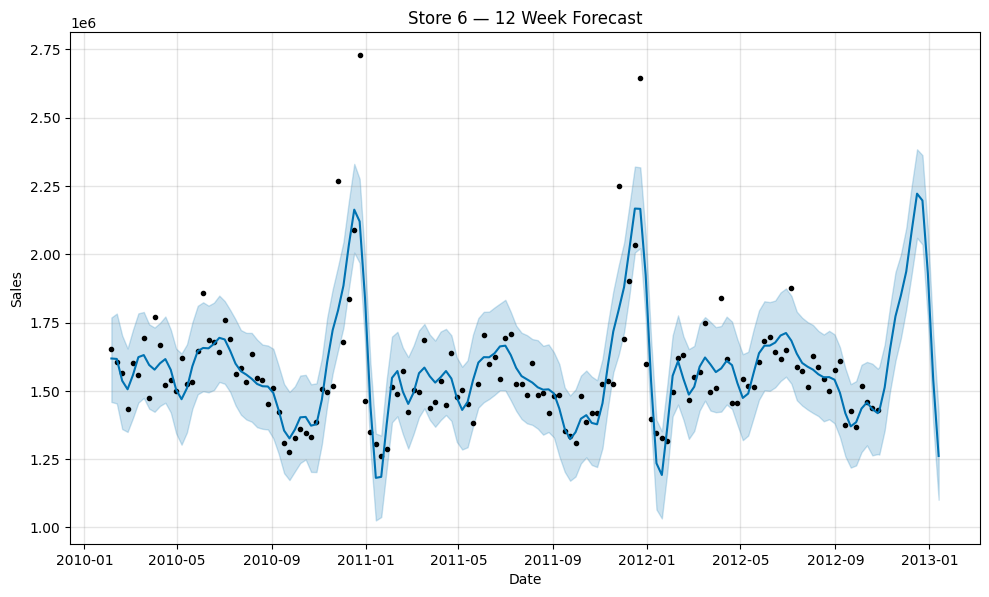

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 7



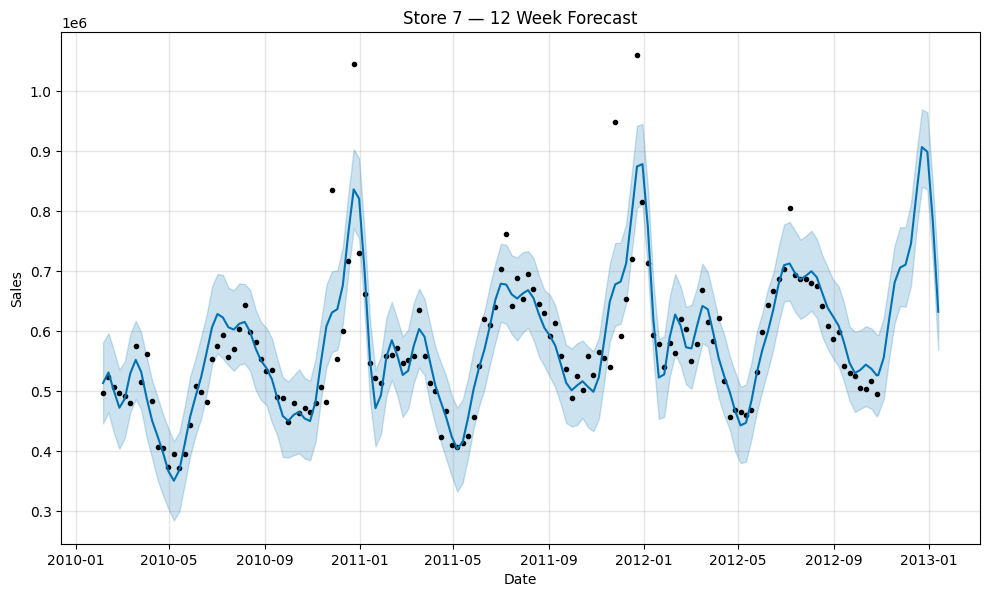

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 8



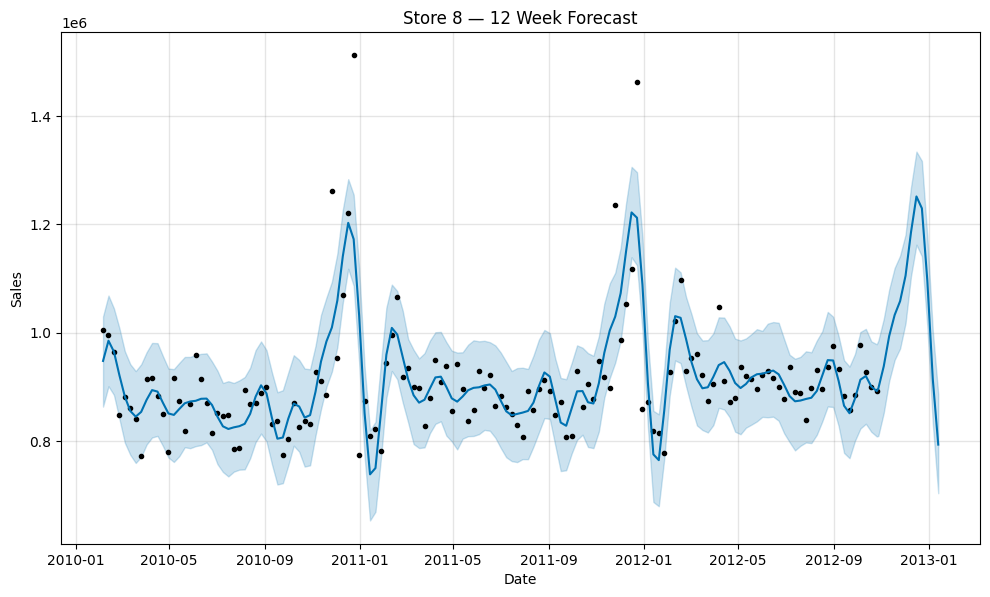

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 9



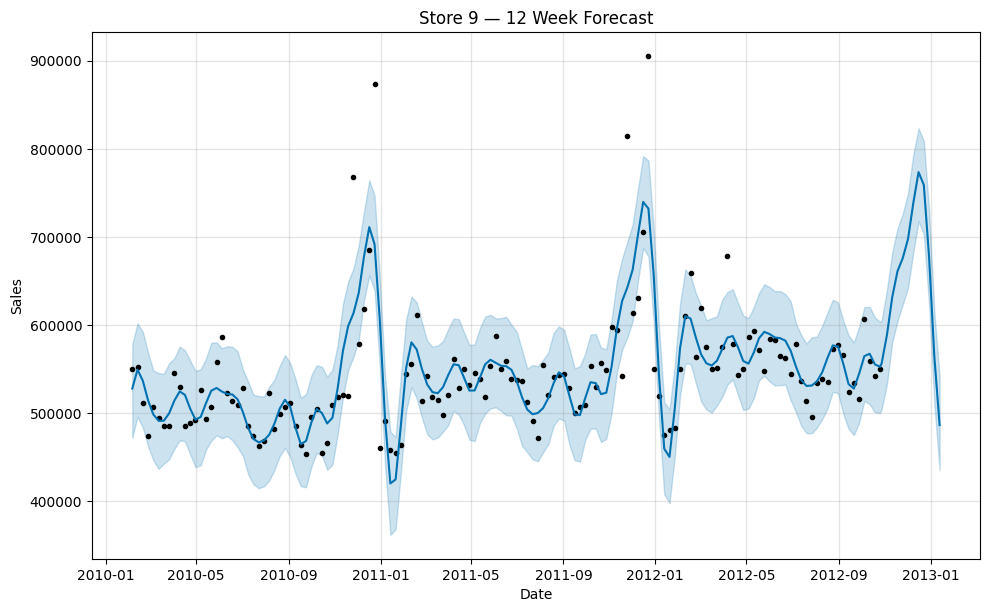

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 10



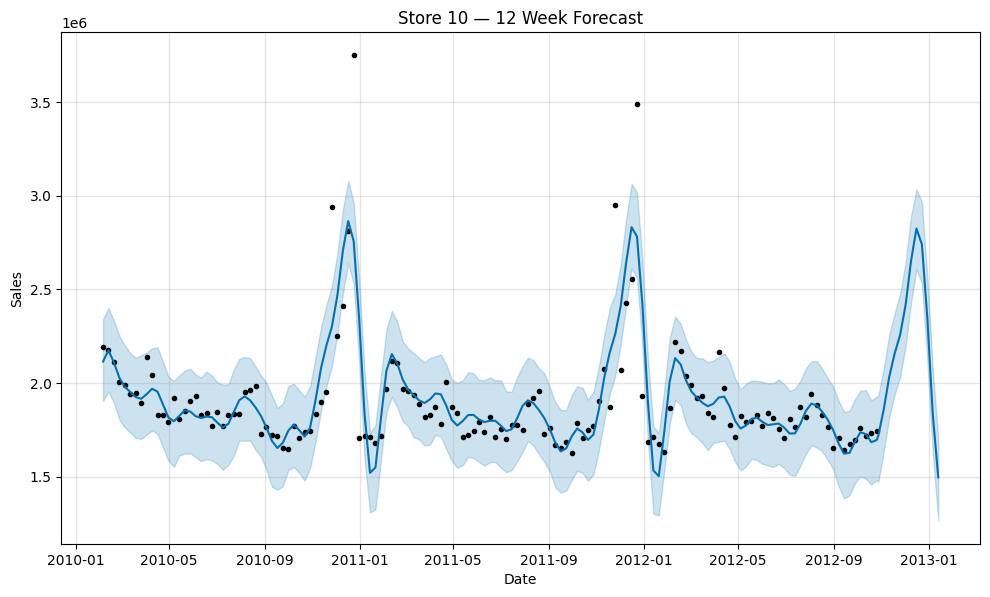

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 11



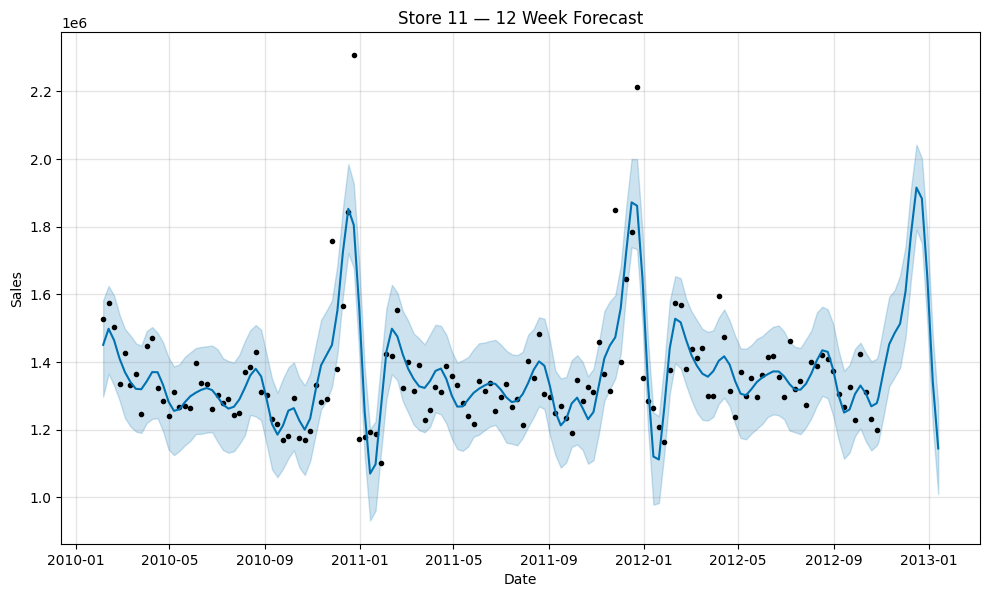

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 12



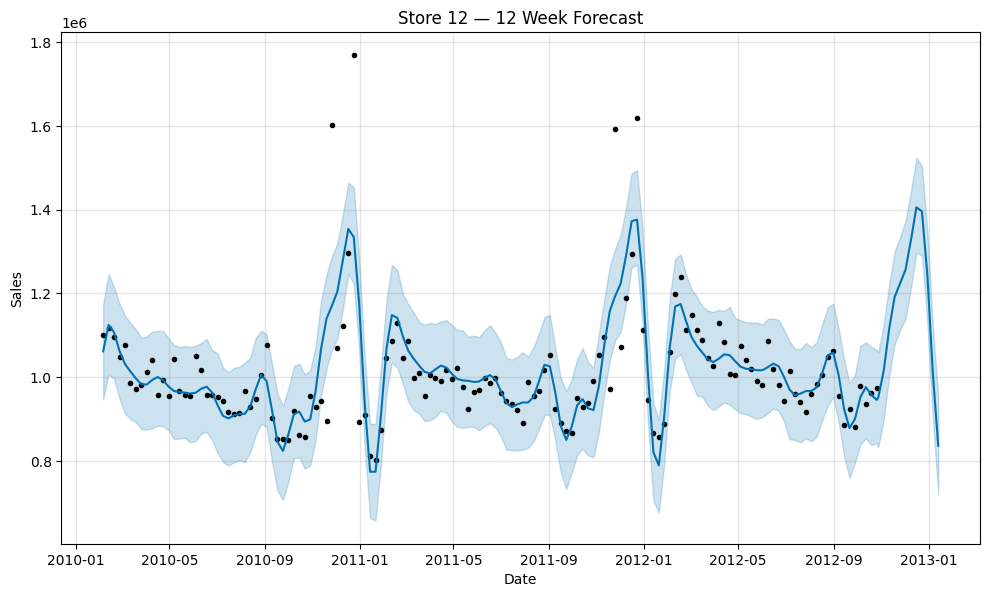

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 13



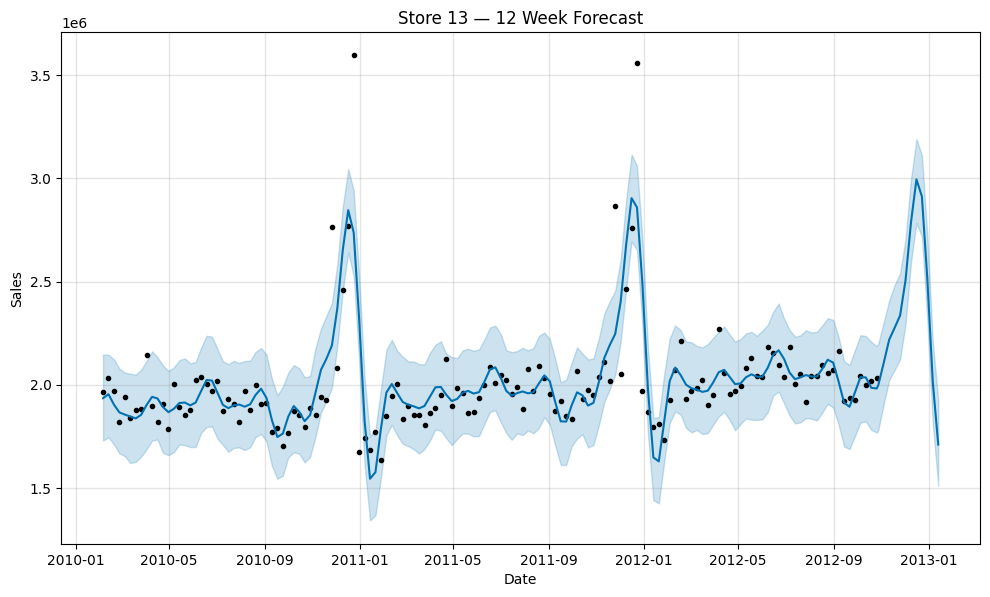

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 14



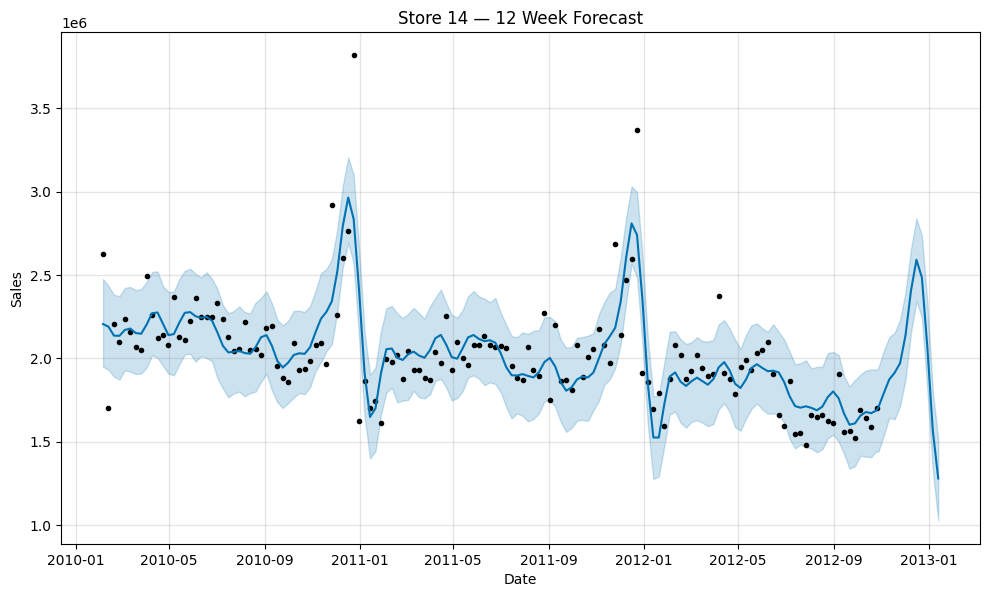

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 15



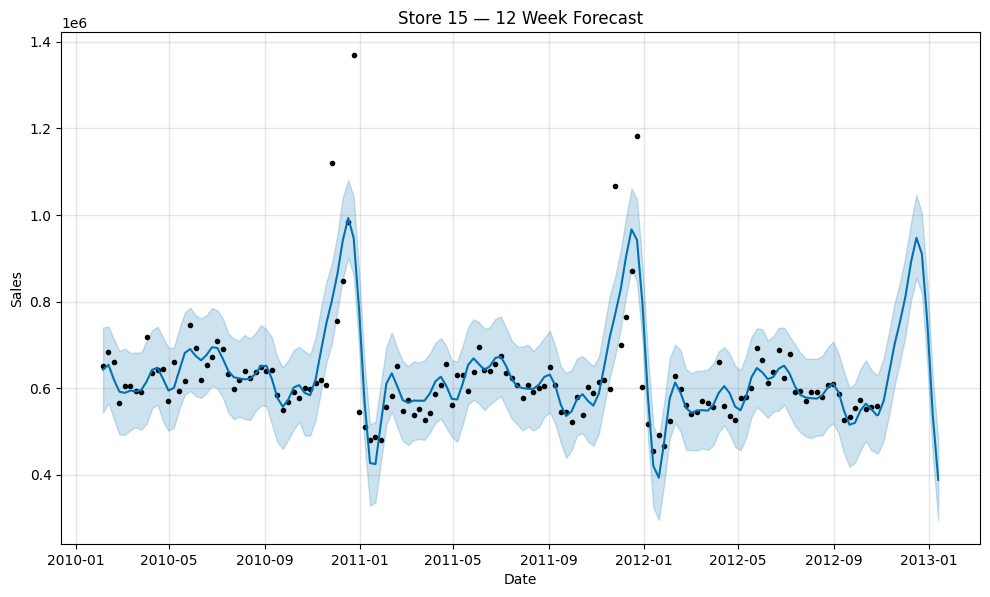

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 16



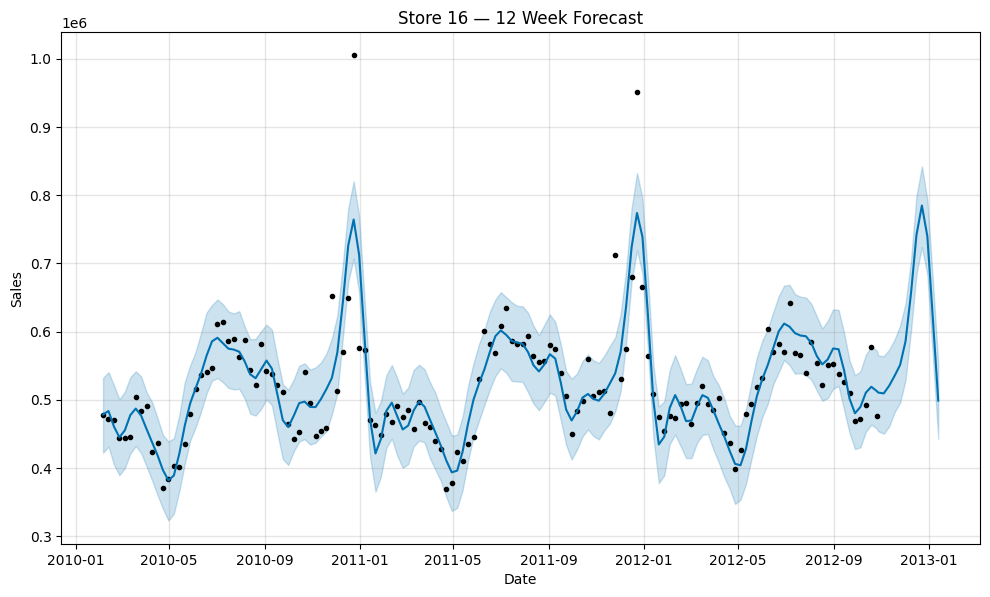

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 17



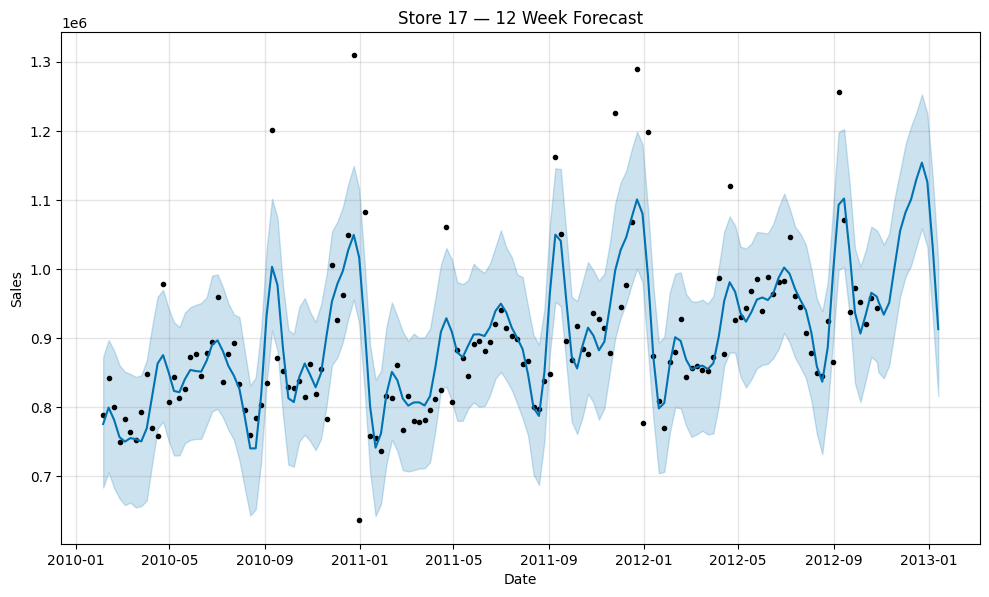

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 18



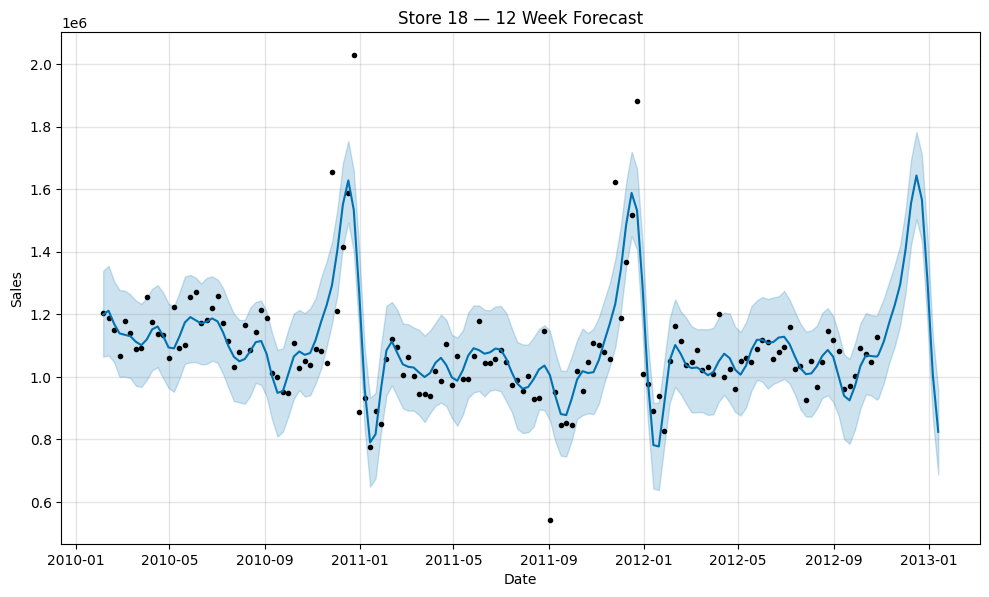

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 19



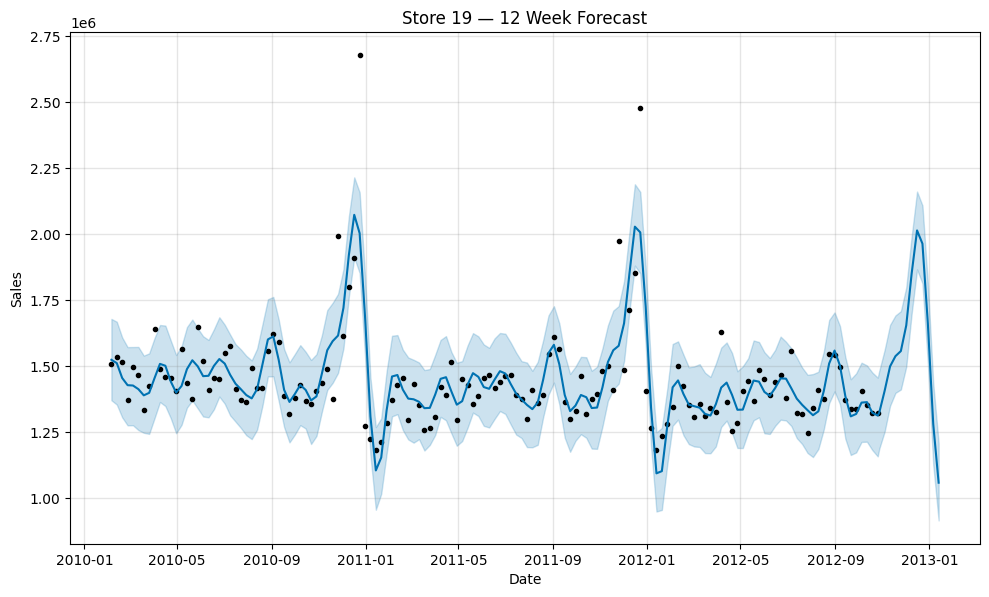

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 20



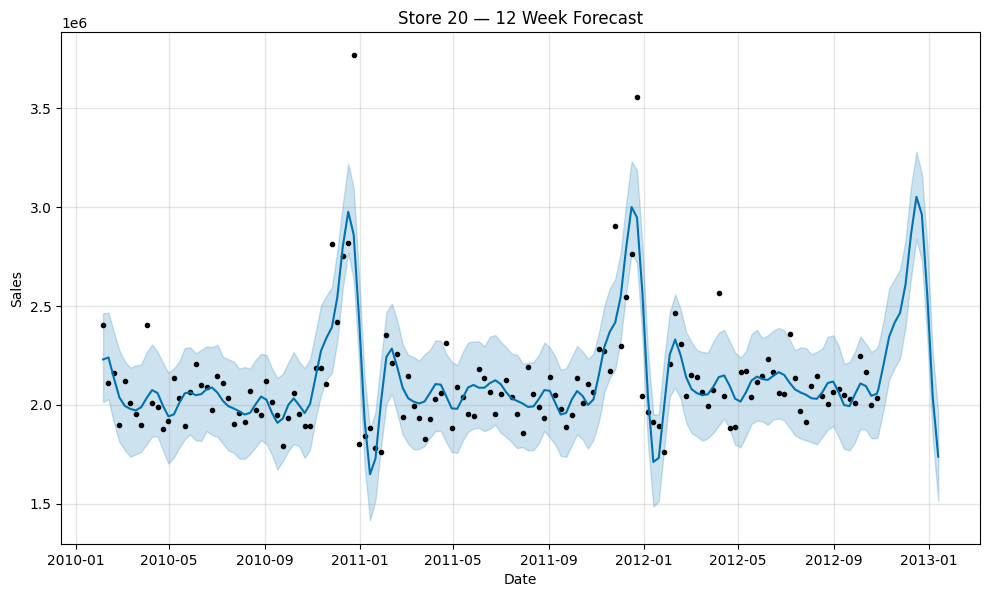

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 21



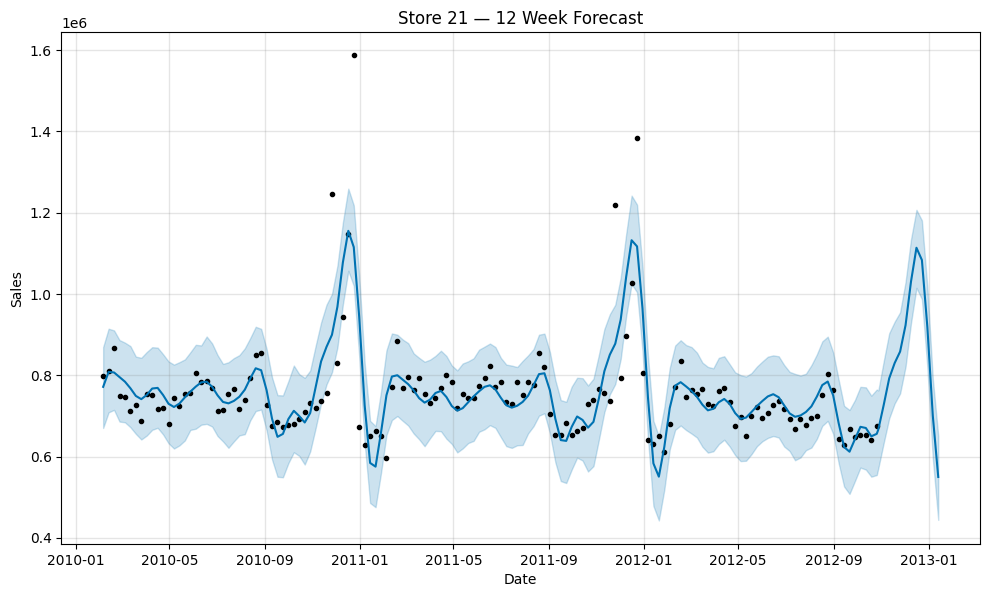

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 22



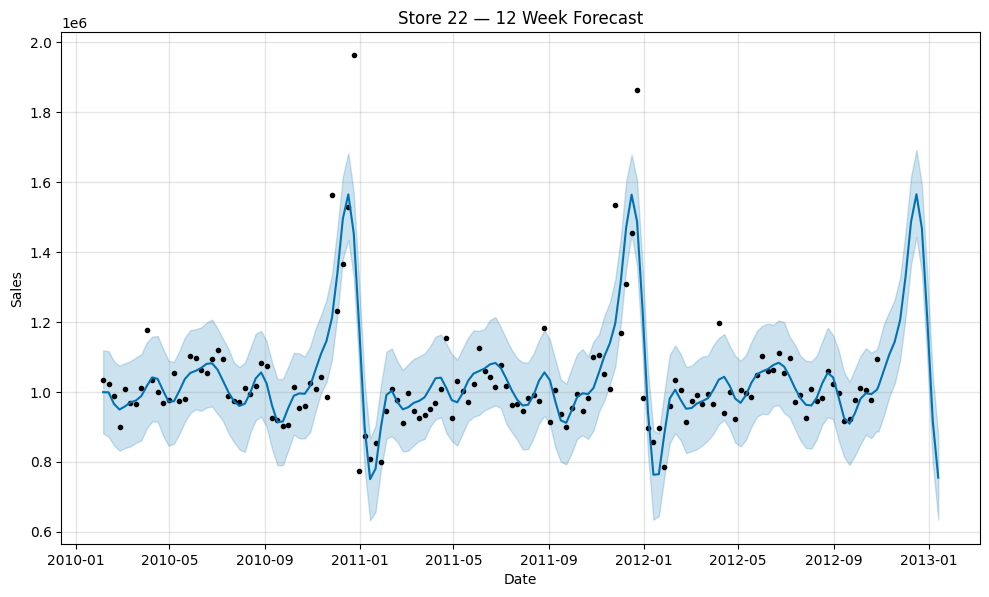

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 23



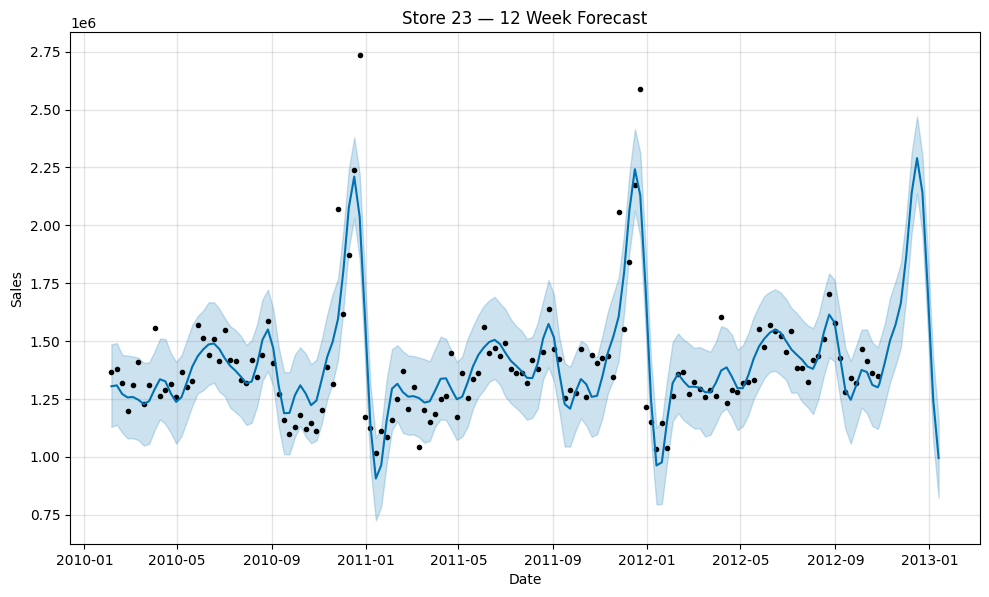

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 24



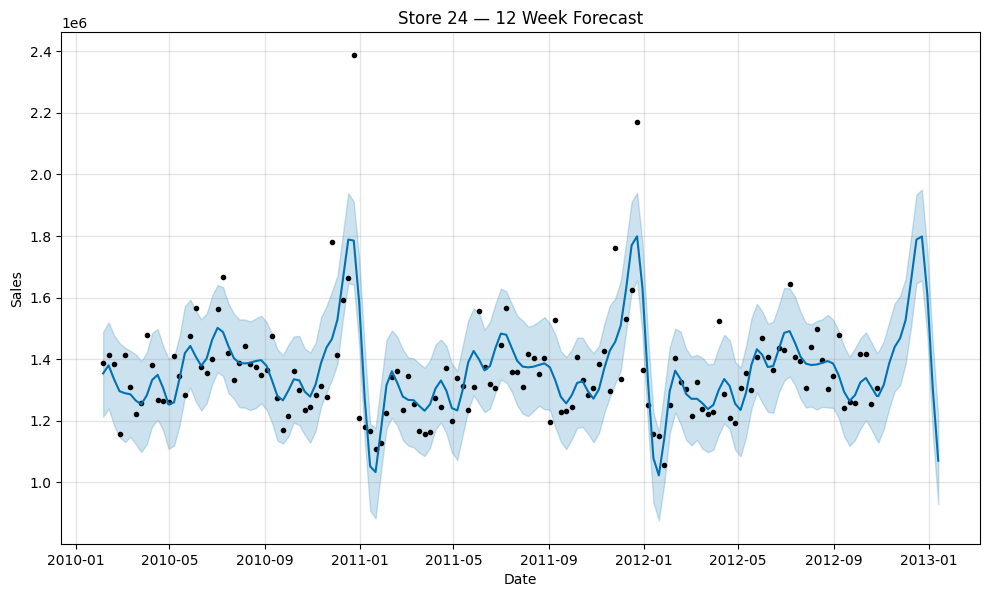

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 25



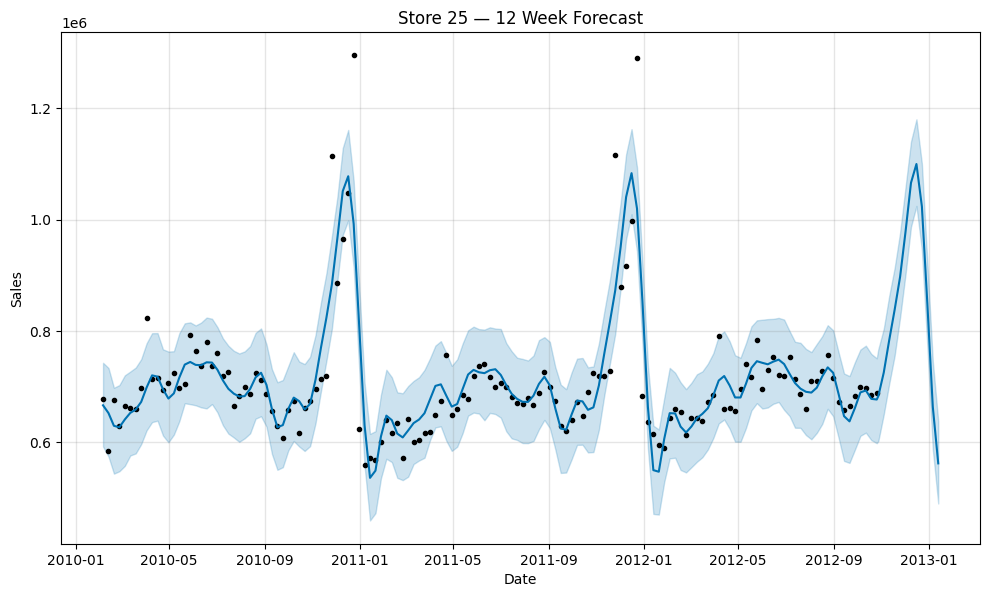

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 26



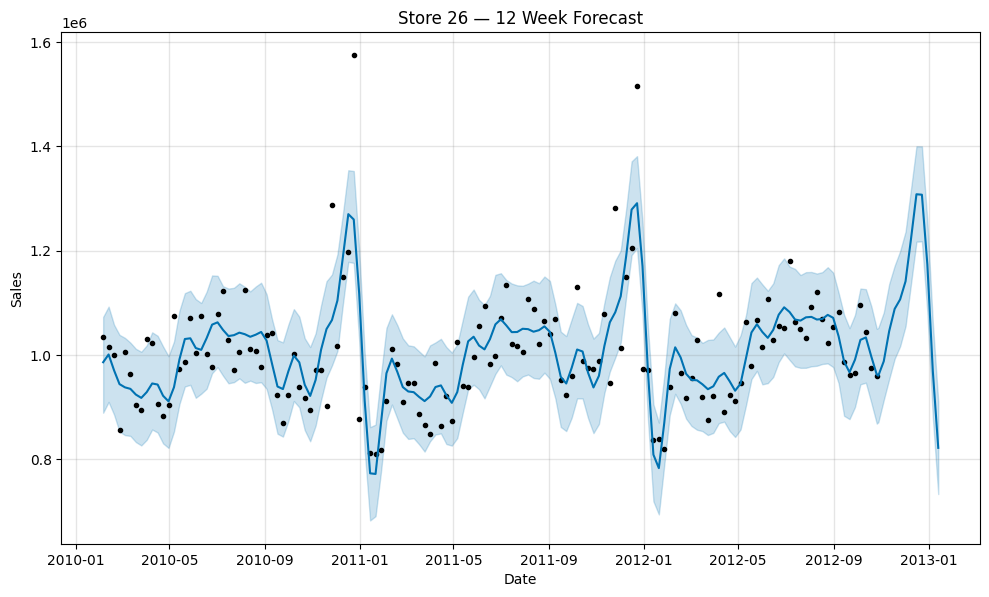

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 27



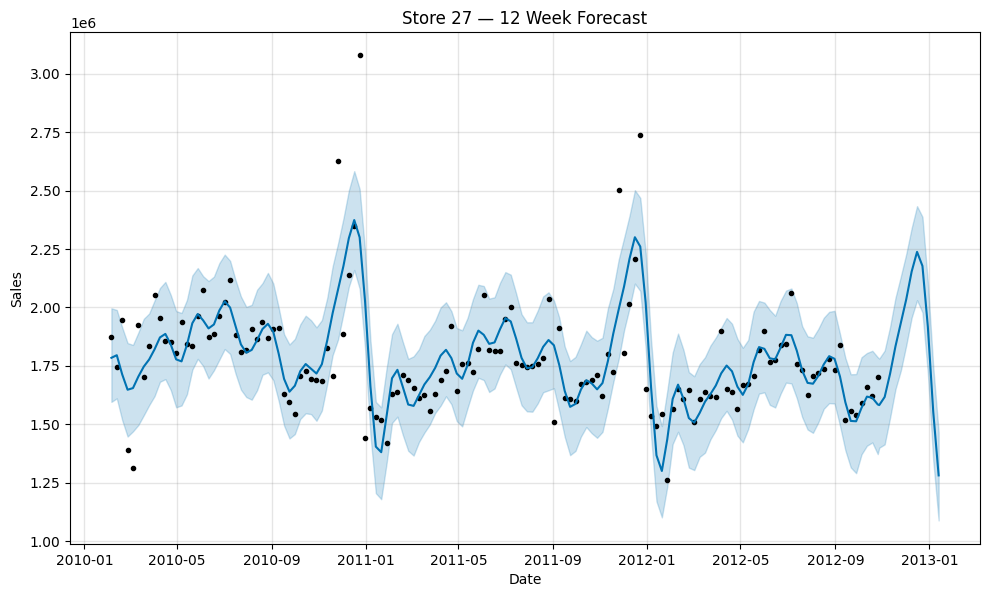

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 28



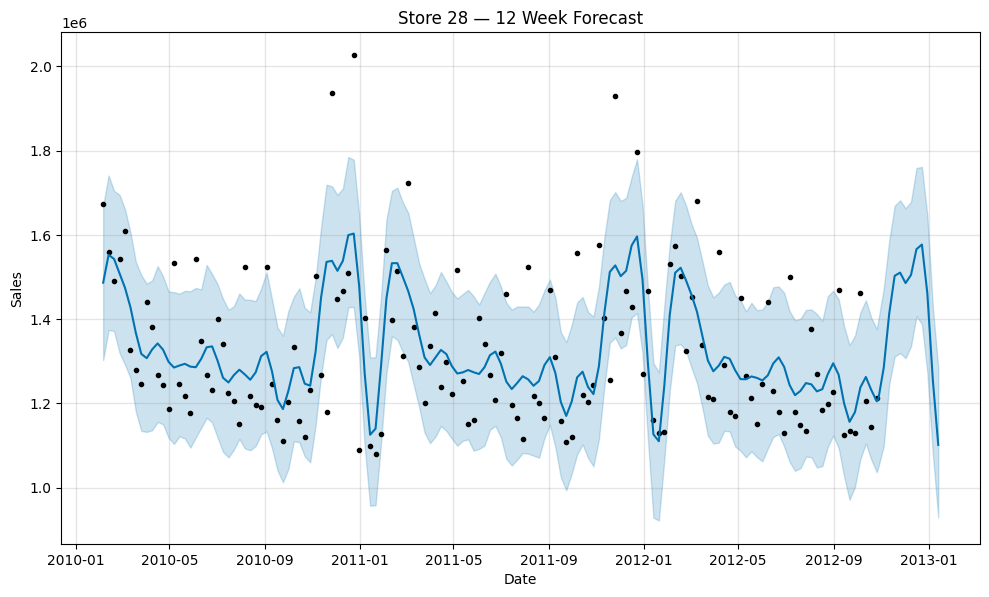

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 29



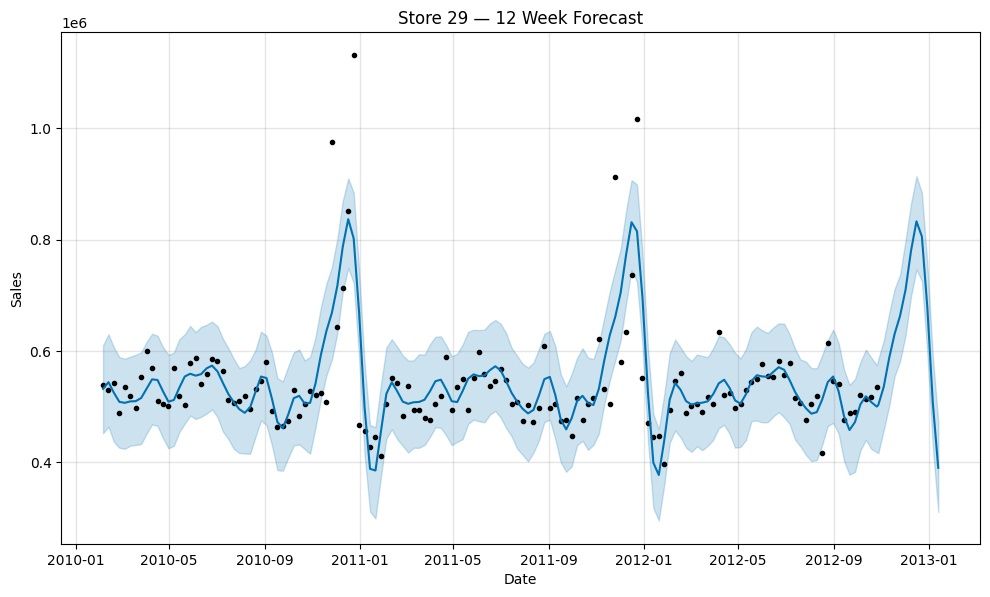

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 30



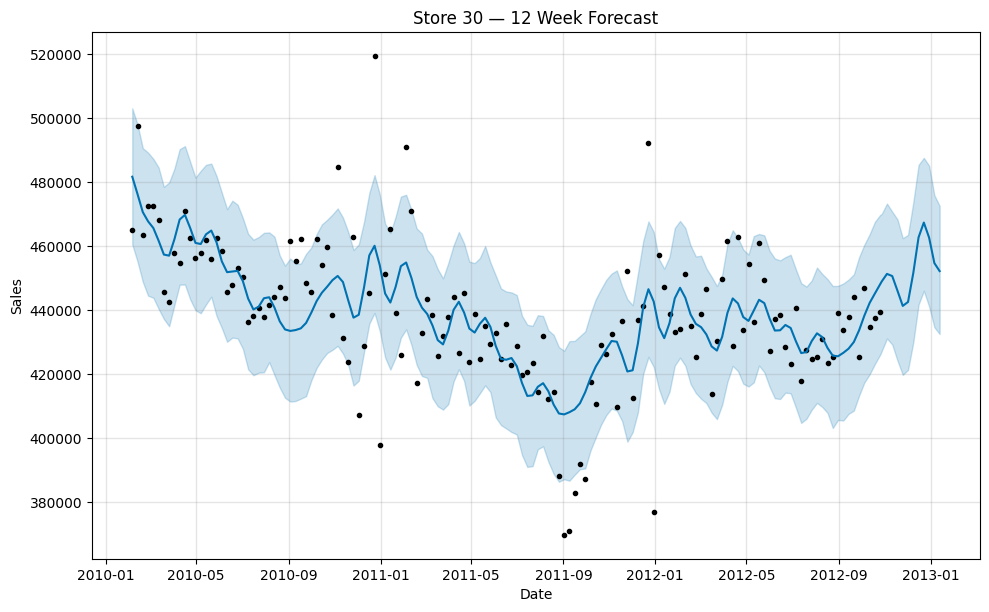

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 31



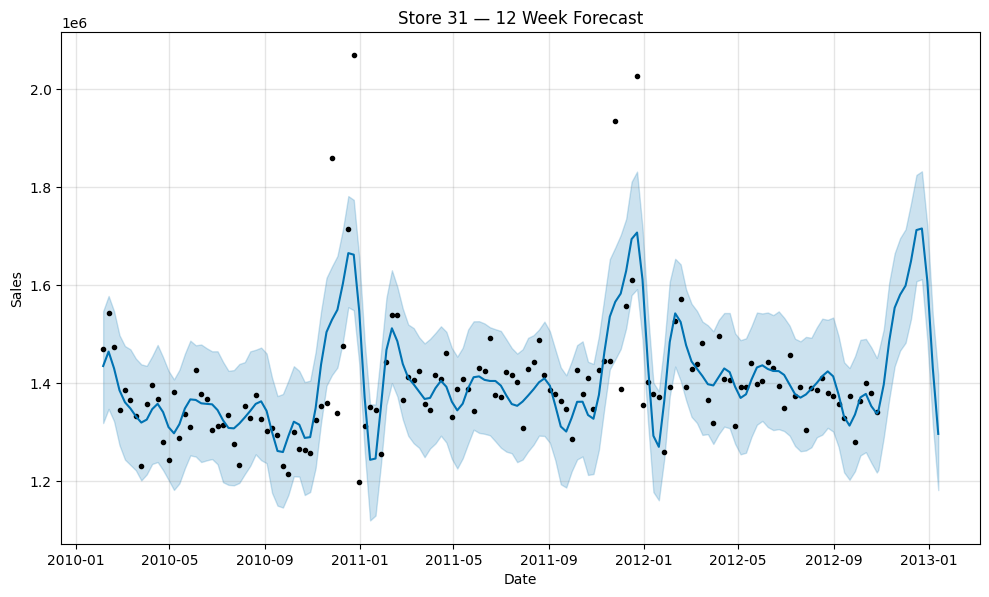

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 32



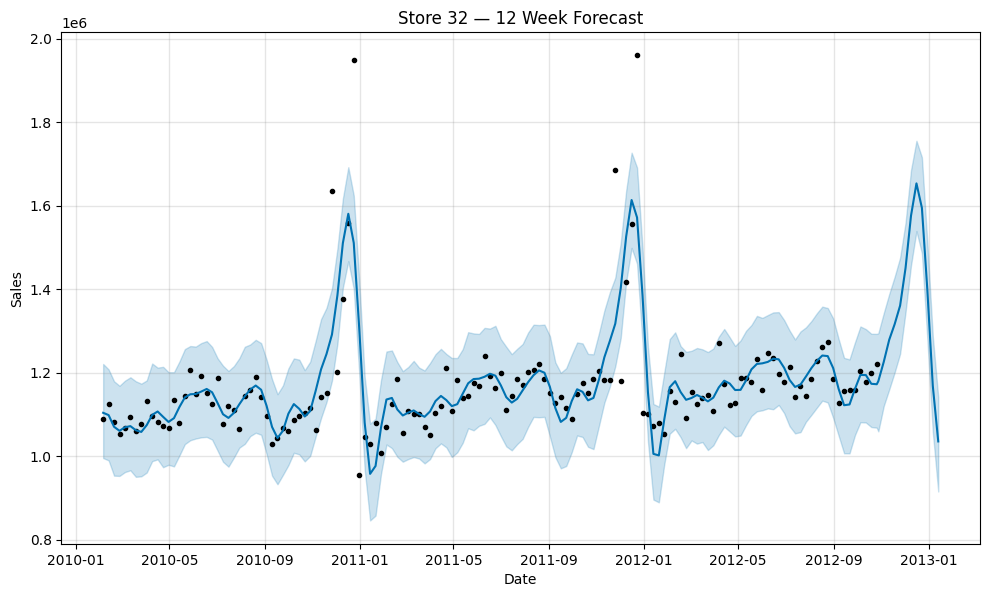

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 33



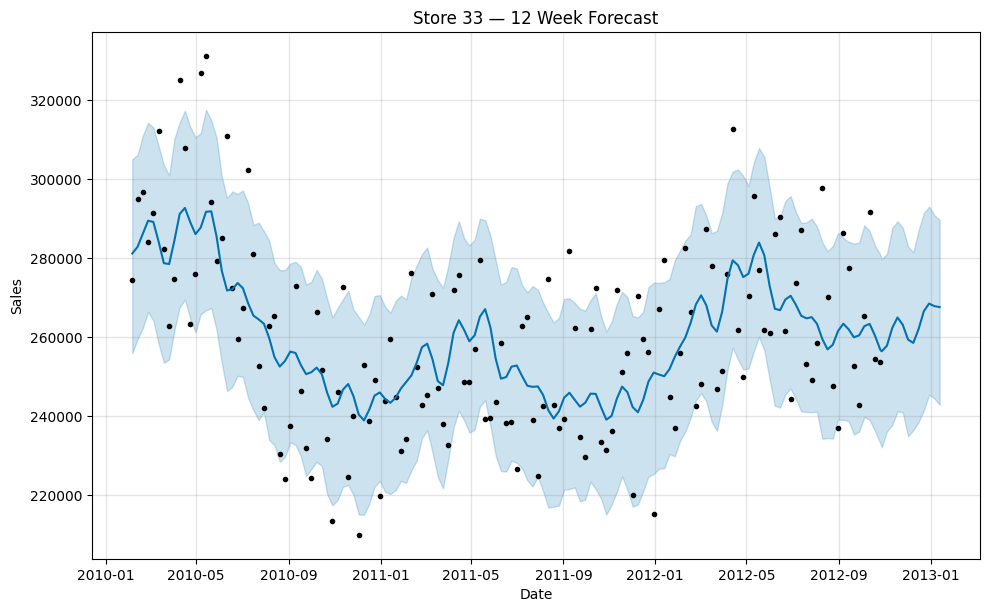

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 34



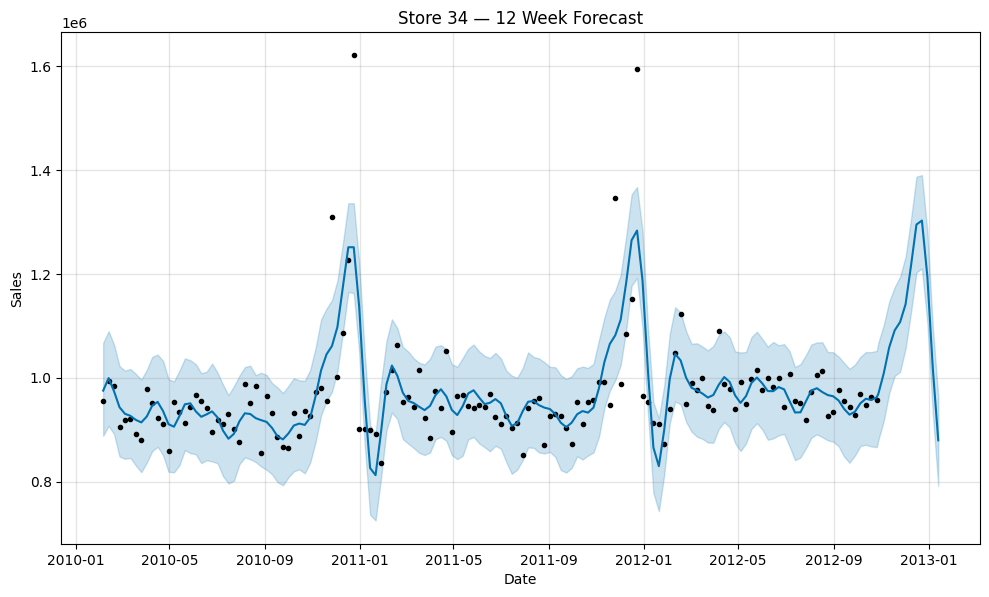

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 35



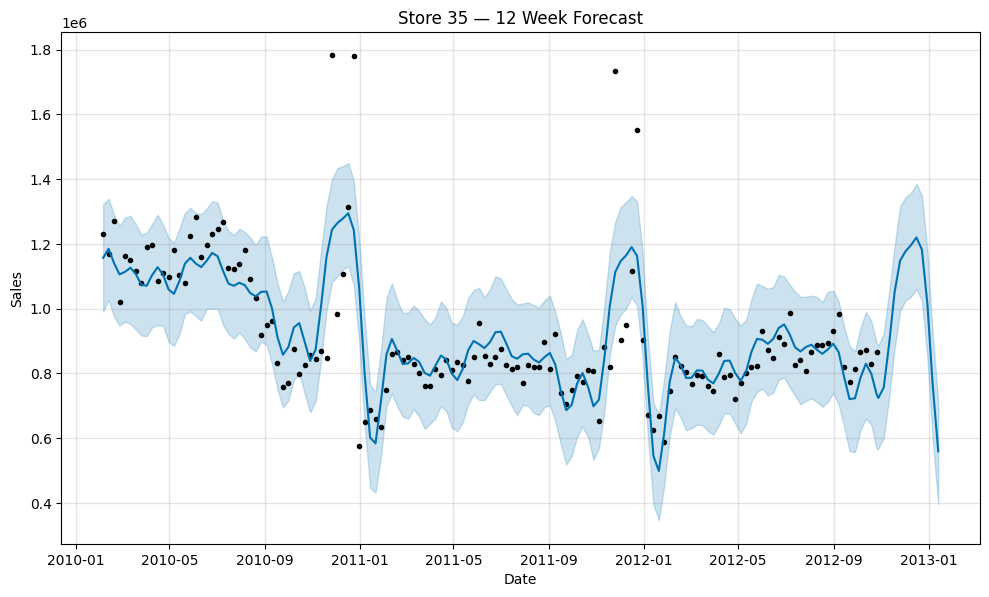

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 36



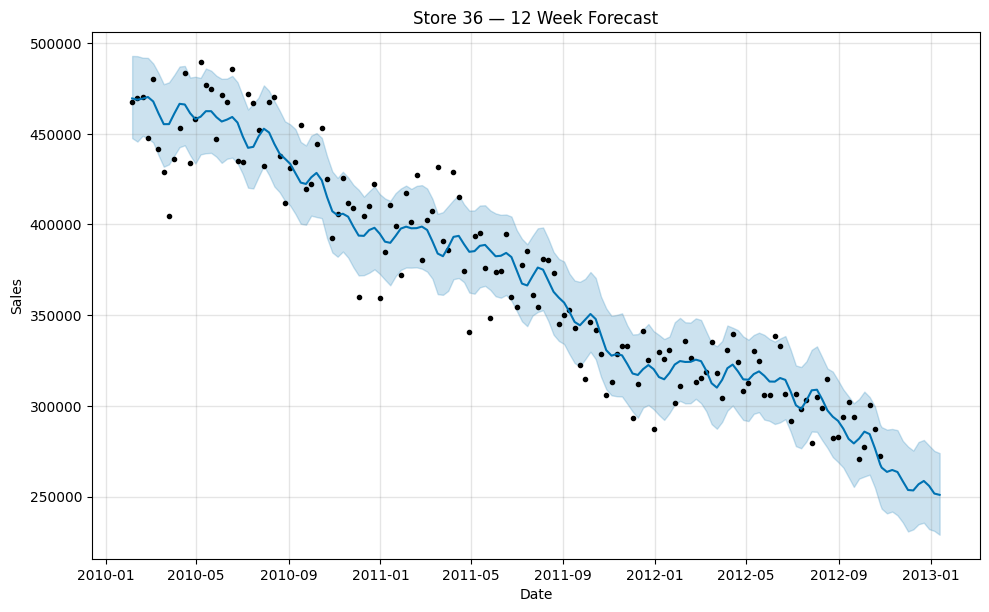

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 37



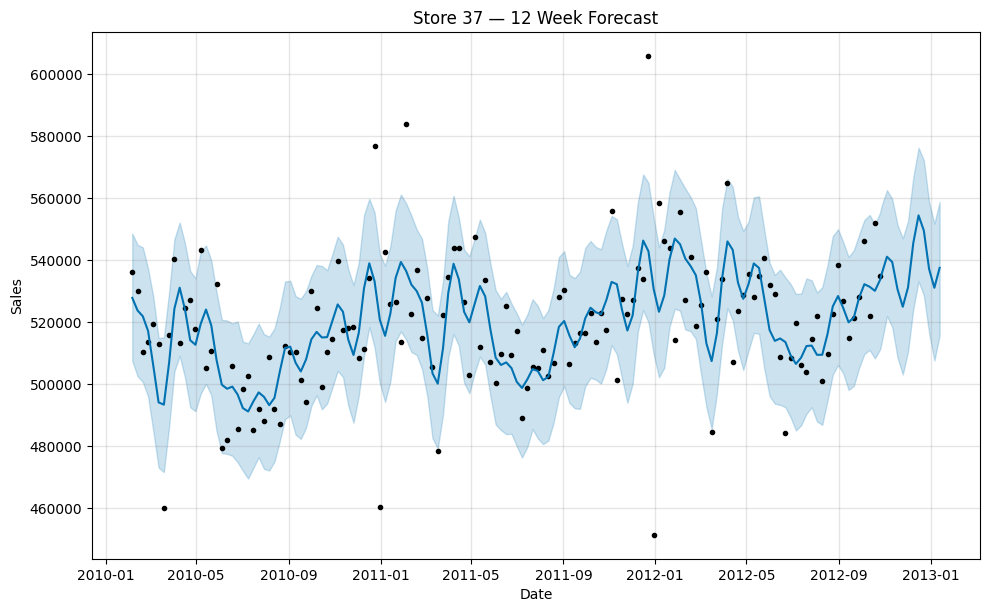

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 38



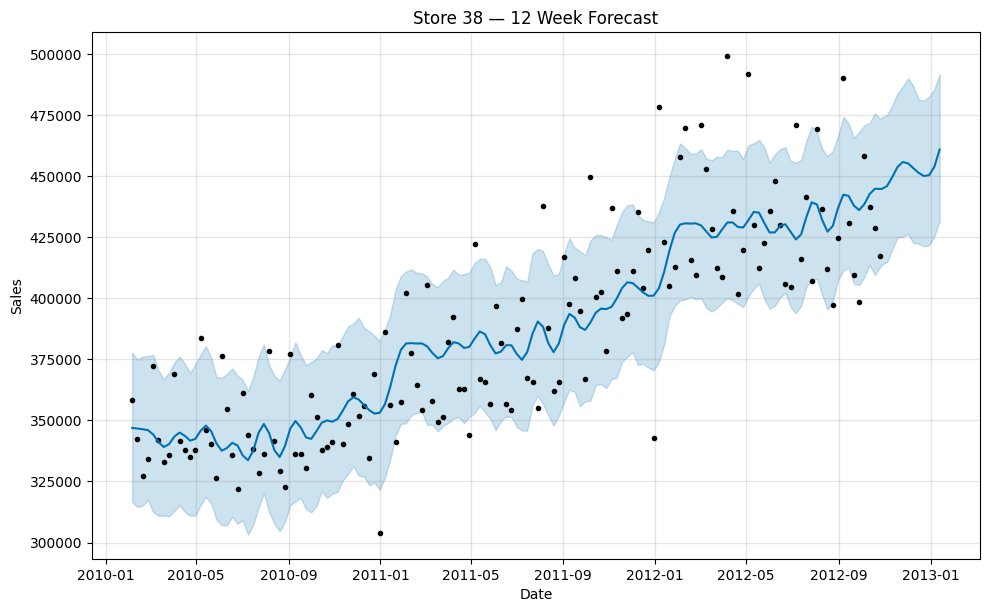

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 39



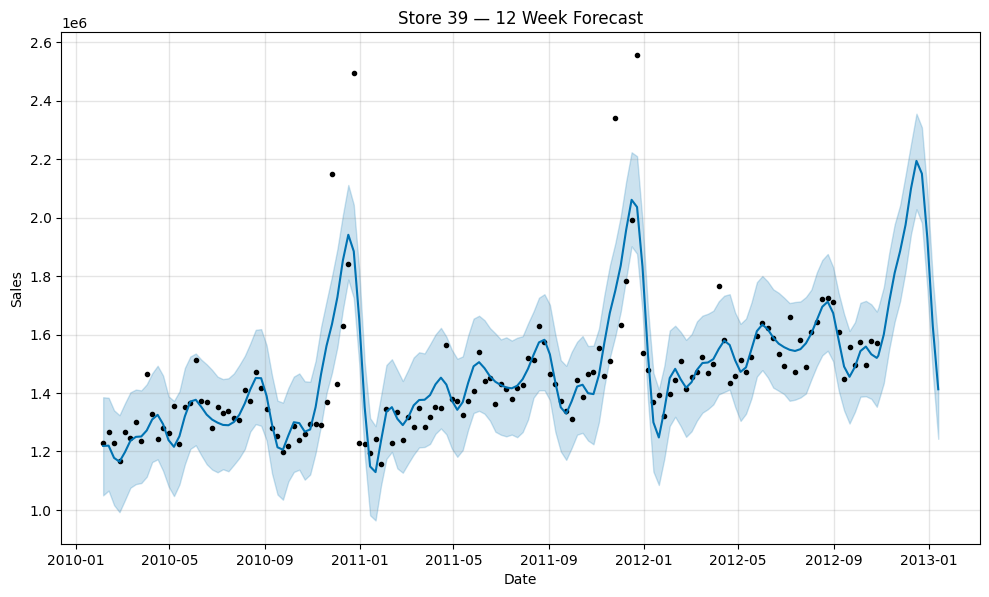

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 40



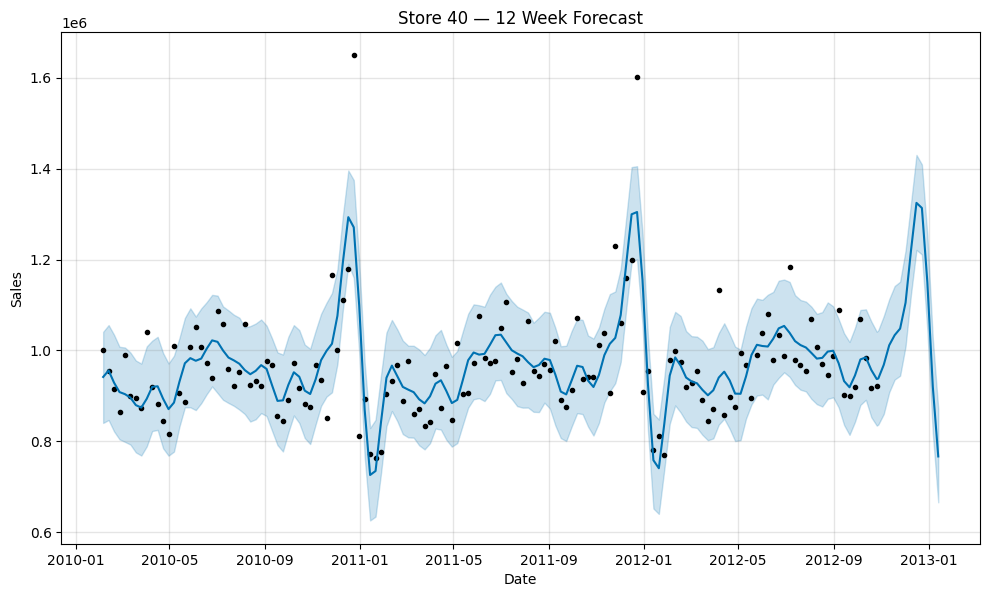

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 41



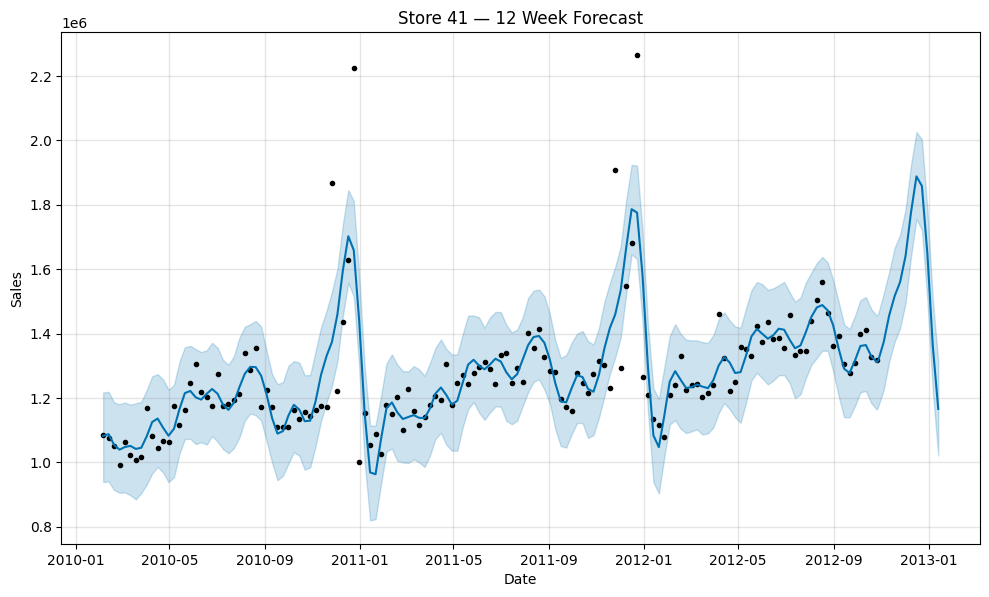

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 42



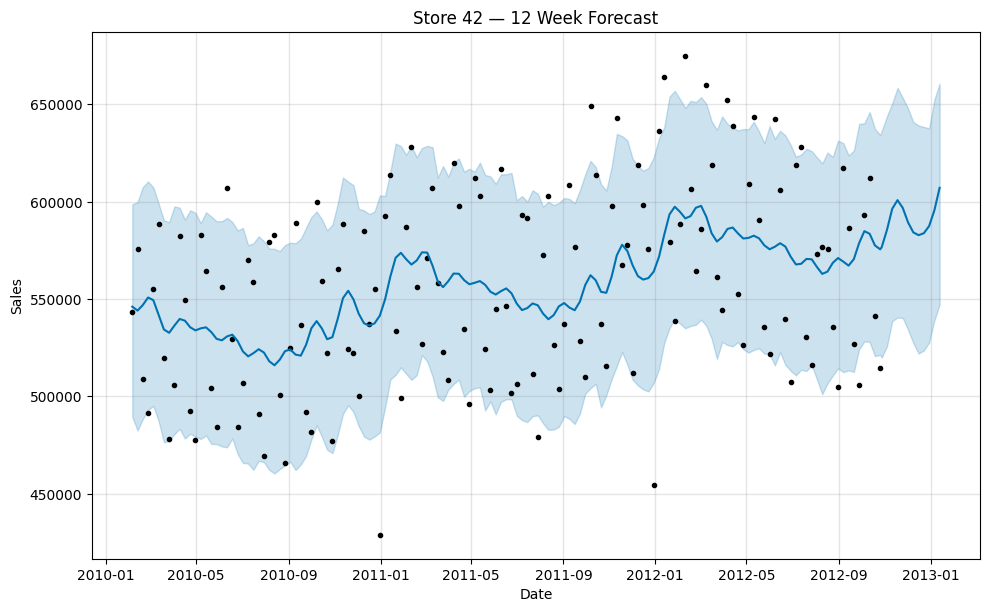

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 43



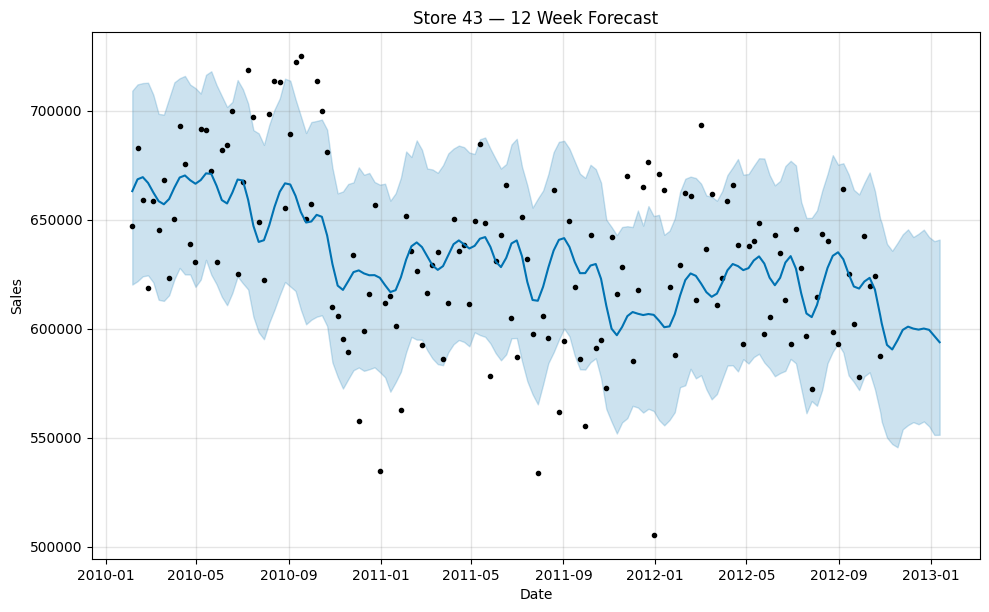

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 44



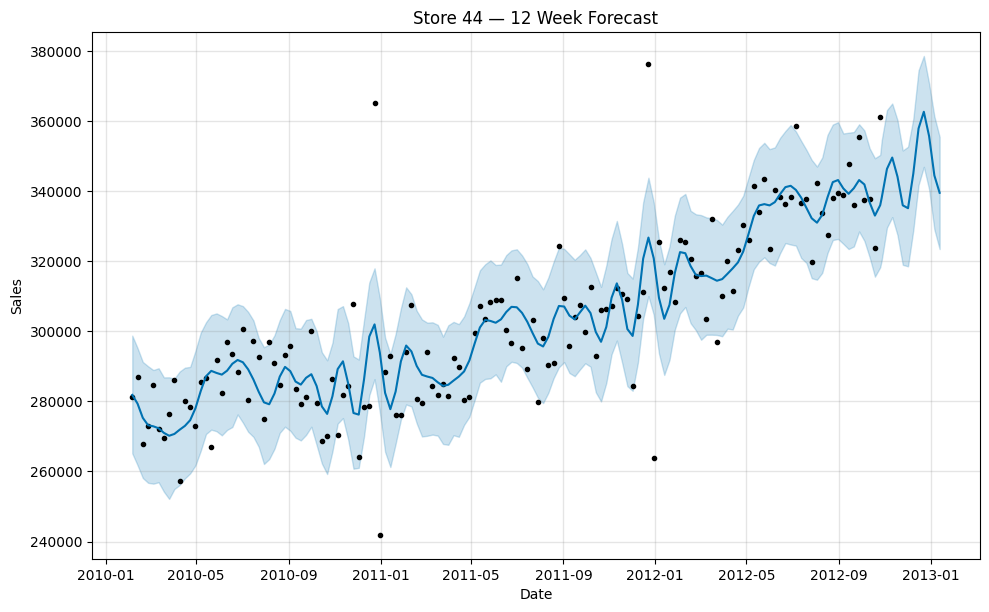

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecast for Store 45



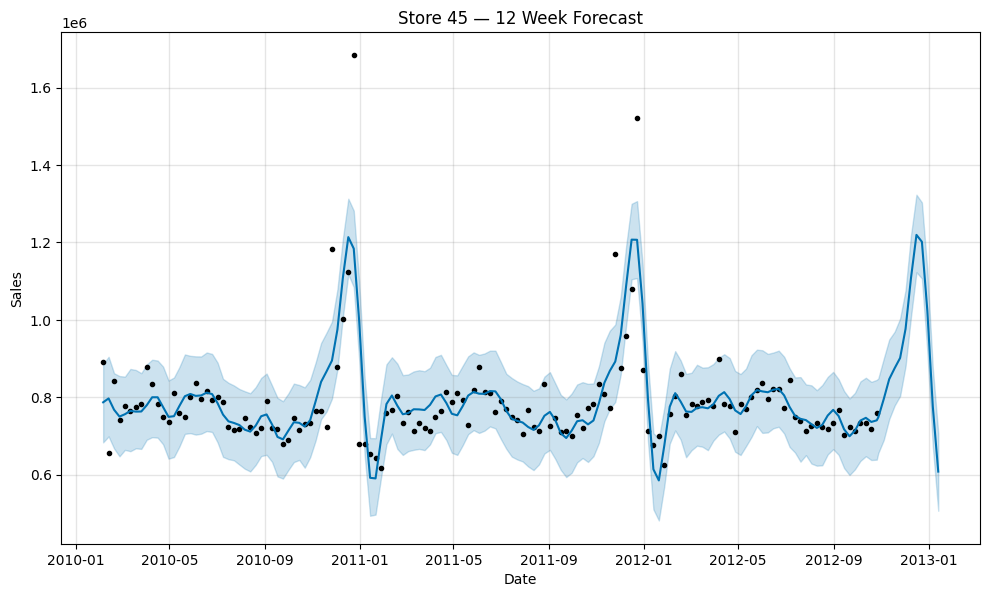

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecasting feature: CPI



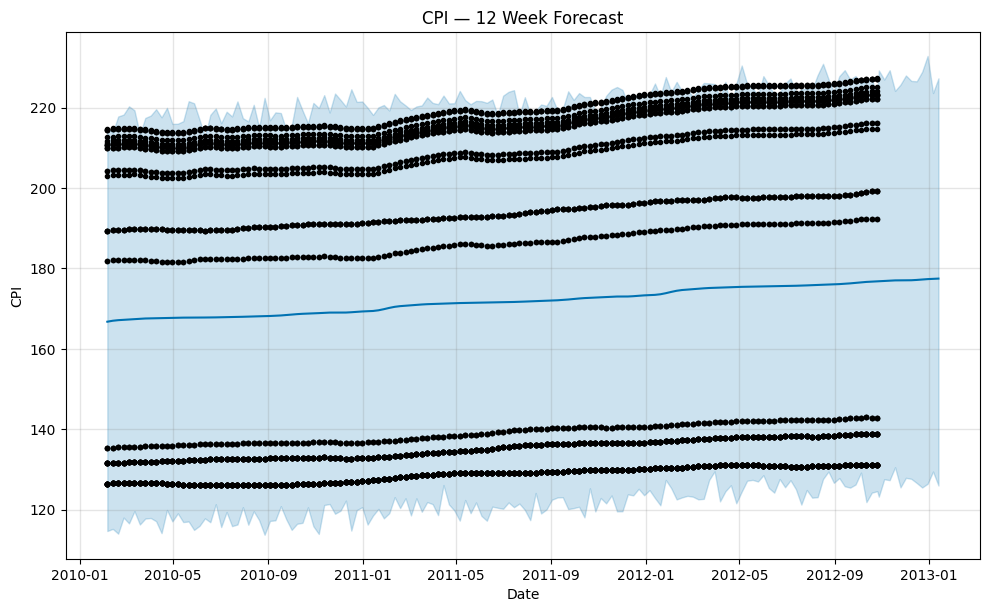

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecasting feature: Temperature



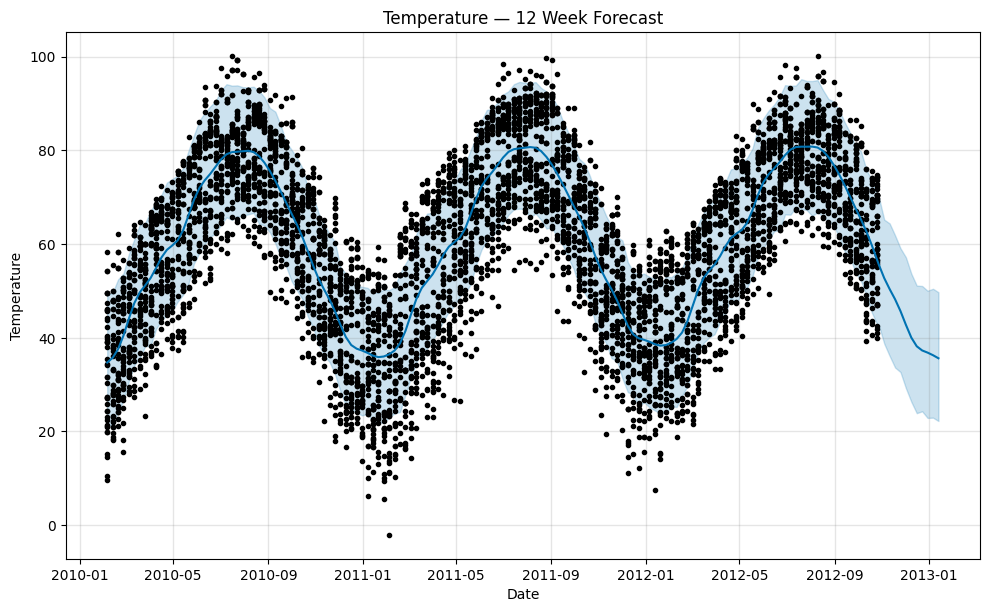

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecasting feature: Holiday_Flag



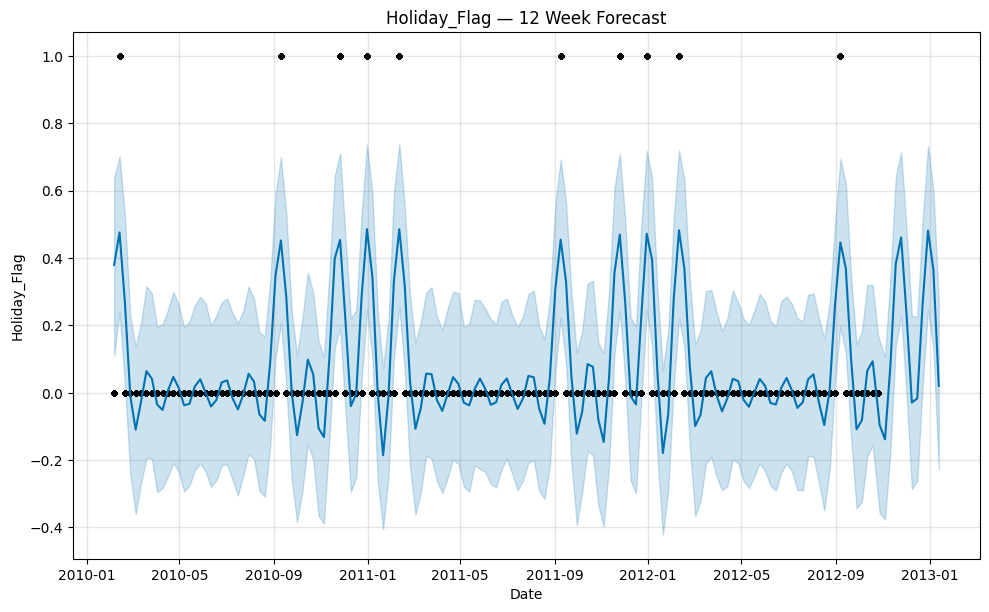

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecasting feature: Fuel_Price



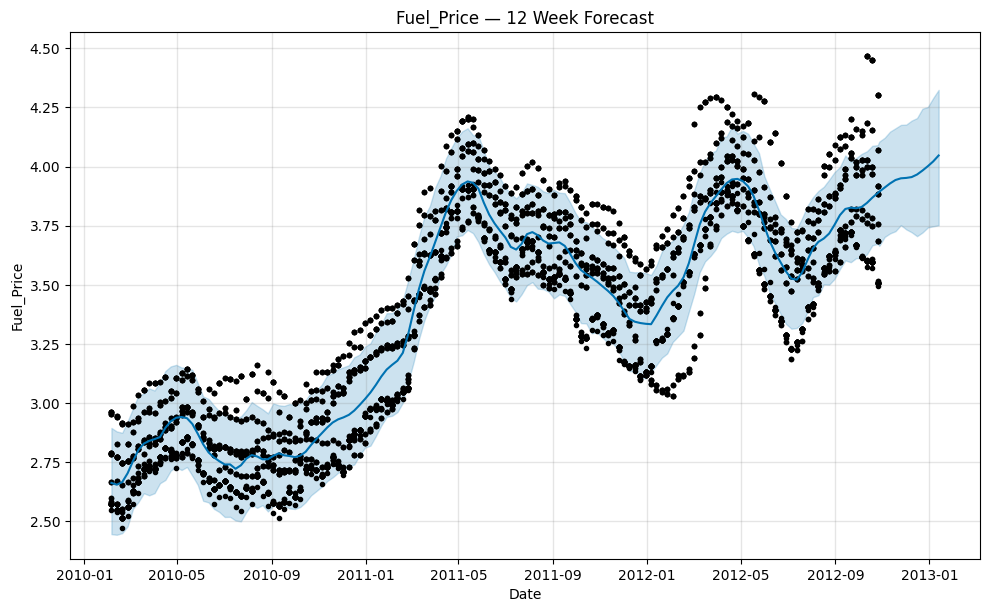

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



   Forecasting feature: Unemployment



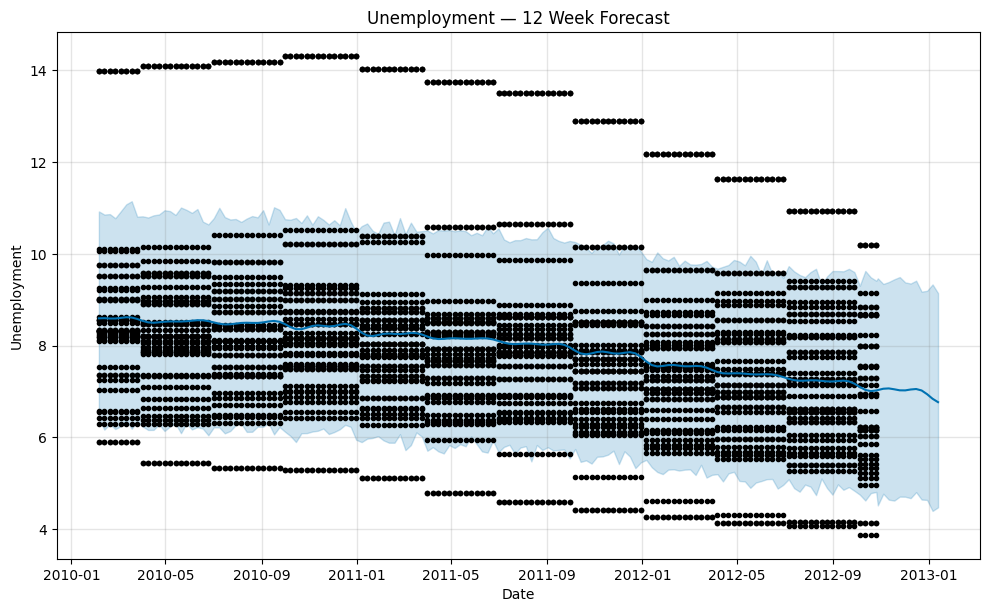

In [6]:
# ----------------------------------------------------------------------
# 1. TOTAL WEEKLY SALES BY MONTH
# ----------------------------------------------------------------------
df_monthly = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()

plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly.values)
plt.title("Total Weekly Sales Across All Stores by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# 2. TOTAL SALES PER STORE
# ----------------------------------------------------------------------
store_sales = df.groupby("Store")["Weekly_Sales"].sum()

plt.figure(figsize=(12,6))
store_sales.plot(kind="bar")
plt.title("Total Sales of Each Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# 3. TREND OF EACH STORE (MONTHLY LINE PLOT)
# ----------------------------------------------------------------------
plt.figure(figsize=(14,8))

for store, data in df.groupby("Store"):
    monthly = data.groupby(pd.Grouper(key="Date", freq="M"))["Weekly_Sales"].sum()
    plt.plot(monthly.index, monthly.values, label=f"Store {store}")

plt.title("Monthly Sales Trend of Each Store")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# 4. FEATURE TRENDS AGAINST WEEKLY SALES (LINE CORRELATION)
# ----------------------------------------------------------------------
features = ["CPI", "Temperature", "Holiday_Flag", "Fuel_Price", "Unemployment"]

for col in features:
    plt.figure(figsize=(12,5))

    monthly_feat = df.groupby(pd.Grouper(key='Date', freq='M'))[col].mean()
    monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].mean()

    ax1 = plt.gca()               # FIRST Y-axis (feature)
    ax2 = ax1.twinx()             # SECOND Y-axis (sales)

    # Plot feature on left axis
    ax1.plot(monthly_feat.index, monthly_feat.values, color='blue', linewidth=2)
    ax1.set_ylabel(col, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot weekly sales on right axis
    ax2.plot(monthly_sales.index, monthly_sales.values, color='red', linewidth=2)
    ax2.set_ylabel("Weekly Sales", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f"{col} vs Weekly Sales (Dual Axis Trend)")
    plt.grid(True)
    plt.show()

# ----------------------------------------------------------------------
# 5. FORECAST — NEXT 12 WEEKS FOR EACH STORE (PROPHET)
# ----------------------------------------------------------------------
forecast_results_store = {}

for store, data in df.groupby("Store"):

    df_prophet = data[['Date', 'Weekly_Sales']].rename(columns={
        'Date': 'ds',
        'Weekly_Sales': 'y'
    })

    model = Prophet()
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=12, freq='W')
    forecast = model.predict(future)

    forecast_results_store[store] = forecast

    print(f"\n==========================")
    print(f"   Forecast for Store {store}")
    print("==========================\n")

    model.plot(forecast, xlabel="Date", ylabel="Sales")
    plt.title(f"Store {store} — 12 Week Forecast")
    plt.grid(True)
    plt.show()

# ----------------------------------------------------------------------
# 6. FORECAST — NEXT 12 WEEKS FOR EACH FEATURE (CPI, Temp, etc.)
# ----------------------------------------------------------------------
forecast_feature_results = {}

for col in features:
    print(f"\n==========================")
    print(f"   Forecasting feature: {col}")
    print("==========================\n")

    df_feat = df[['Date', col]].rename(columns={'Date':'ds', col:'y'})

    model = Prophet()
    model.fit(df_feat)

    future = model.make_future_dataframe(periods=12, freq='W')
    forecast = model.predict(future)

    forecast_feature_results[col] = forecast

    model.plot(forecast, xlabel="Date", ylabel=col)
    plt.title(f"{col} — 12 Week Forecast")
    plt.grid(True)
    plt.show()

In [7]:
all_store_forecasts = []

for store, forecast in forecast_results_store.items():
    temp = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
    temp['Store'] = store
    all_store_forecasts.append(temp)

df_store_forecast = pd.concat(all_store_forecasts, ignore_index=True)
df_store_forecast.to_csv("/content/forecast_stores.csv", index=False)

# -------------------------------
# 2. SAVE FORECASTS PER FEATURE
# -------------------------------
all_feature_forecasts = []

for feature, forecast in forecast_feature_results.items():
    temp = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
    temp['Feature'] = feature
    all_feature_forecasts.append(temp)

df_feature_forecast = pd.concat(all_feature_forecasts, ignore_index=True)
df_feature_forecast.to_csv("/content/forecast_features.csv", index=False)

In [8]:
# ----------------------------------------------------------------------
# 1. SAVE ALL STORE MODELS INTO ONE FILE
# ----------------------------------------------------------------------
store_models = {}

for store, data in df.groupby("Store"):
    df_prophet = data[['Date', 'Weekly_Sales']].rename(columns={'Date':'ds', 'Weekly_Sales':'y'})
    model = Prophet()
    model.fit(df_prophet)
    store_models[store] = model

# Save all store models in one file
joblib.dump(store_models, "prophet_models_stores.pkl")
print("Saved all store Prophet models into 'prophet_models_stores.pkl'.")

# ----------------------------------------------------------------------
# 2. SAVE ALL FEATURE MODELS INTO ONE FILE
# ----------------------------------------------------------------------
features = ["CPI", "Temperature", "Holiday_Flag", "Fuel_Price", "Unemployment"]
feature_models = {}

for col in features:
    df_feat = df[['Date', col]].rename(columns={'Date':'ds', col:'y'})
    model = Prophet()
    model.fit(df_feat)
    feature_models[col] = model

# Save all feature models in one file
joblib.dump(feature_models, "prophet_models_features.pkl")
print("Saved all feature Prophet models into 'prophet_models_features.pkl'.")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

Saved all store Prophet models into 'prophet_models_stores.pkl'.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Saved all feature Prophet models into 'prophet_models_features.pkl'.


In [9]:
# Dictionary to store anomalies
anomalies_store = {}

for store, data in df.groupby("Store"):

    # Prepare Prophet dataframe
    df_prophet = data[['Date', 'Weekly_Sales']].rename(columns={'Date':'ds', 'Weekly_Sales':'y'})

    # Fit the model
    model = Prophet()
    model.fit(df_prophet)

    # Forecast next 12 weeks
    future = model.make_future_dataframe(periods=12, freq='W')
    forecast = model.predict(future)

    # Merge actuals with forecast
    merged = pd.merge(df_prophet, forecast[['ds','yhat','yhat_lower','yhat_upper']], on='ds', how='left')

    # Detect anomalies: actual outside forecast bounds
    merged['anomaly'] = ((merged['y'] > merged['yhat_upper']) | (merged['y'] < merged['yhat_lower']))

    # Store anomalies
    anomalies_store[store] = merged[merged['anomaly']]

    # Alert if anomalies exist
    if merged['anomaly'].any():
        print(f"Alert! Anomalies detected in Store {store}:")
        print(merged[merged['anomaly']][['ds','y','yhat','yhat_lower','yhat_upper']])
    else:
        print(f"No anomalies detected in Store {store}.")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 1:
            ds           y          yhat    yhat_lower    yhat_upper
13  2010-05-07  1603955.12  1.461888e+06  1.322828e+06  1.593209e+06
26  2010-08-06  1605491.78  1.452394e+06  1.313544e+06  1.577488e+06
41  2010-11-19  1483784.18  1.634690e+06  1.495221e+06  1.763319e+06
42  2010-11-26  1955624.11  1.655070e+06  1.511892e+06  1.790687e+06
43  2010-12-03  1548033.78  1.701506e+06  1.580496e+06  1.845973e+06
46  2010-12-24  2387950.20  1.904811e+06  1.774459e+06  2.042507e+06
47  2010-12-31  1367320.01  1.723910e+06  1.586947e+06  1.868690e+06
77  2011-07-29  1352219.79  1.490354e+06  1.359412e+06  1.619533e+06
91  2011-11-04  1697229.58  1.533213e+06  1.397108e+06  1.669957e+06
93  2011-11-18  1539483.70  1.686044e+06  1.552367e+06  1.820960e+06
94  2011-11-25  2033320.66  1.708880e+06  1.564906e+06  1.845569e+06
95  2011-12-02  1584083.95  1.746116e+06  1.606941e+06  1.880107e+06
98  2011-12-23  2270188.99  1.976670e+06  1.846831e+06  2.116706e

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 2:
            ds           y          yhat    yhat_lower    yhat_upper
42  2010-11-26  2658725.29  2.150945e+06  1.962753e+06  2.326809e+06
43  2010-12-03  2015781.27  2.270688e+06  2.071141e+06  2.453476e+06
46  2010-12-24  3436007.68  2.626807e+06  2.448590e+06  2.811467e+06
47  2010-12-31  1750434.55  2.284393e+06  2.092920e+06  2.475197e+06
67  2011-05-20  1688281.86  1.881030e+06  1.689425e+06  2.065155e+06
94  2011-11-25  2614202.30  2.125421e+06  1.927317e+06  2.316078e+06
95  2011-12-02  1954952.00  2.227384e+06  2.048353e+06  2.422794e+06
97  2011-12-16  2432736.52  2.651459e+06  2.459781e+06  2.840550e+06
98  2011-12-23  3224369.80  2.654062e+06  2.460178e+06  2.845701e+06
99  2011-12-30  1874226.52  2.358414e+06  2.172070e+06  2.548579e+06
113 2012-04-06  2129035.91  1.904424e+06  1.722593e+06  2.092128e+06


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 3:
            ds          y           yhat     yhat_lower     yhat_upper
0   2010-02-05  461622.22  408055.988997  374463.834198  442552.279473
8   2010-04-02  423294.40  383707.119875  351737.068480  420041.953351
26  2010-08-06  402635.76  360093.701572  328022.174635  392788.356763
41  2010-11-19  372545.32  438736.106509  402918.300770  472834.926576
42  2010-11-26  565567.84  458744.201621  427787.997442  493627.984672
46  2010-12-24  605990.41  485865.746677  451172.634349  520319.004825
47  2010-12-31  382677.76  434461.627303  399838.923013  467045.742098
49  2011-01-14  381061.10  339569.456092  305002.176833  374867.027317
77  2011-07-29  345381.29  380949.272154  346288.948670  415877.309003
91  2011-11-04  459443.22  403303.461907  370527.593742  439123.523744
93  2011-11-18  398838.97  456528.946393  420724.146411  491147.480321
94  2011-11-25  556925.19  477415.678756  442643.230982  510725.127735
96  2011-12-09  468772.80  518699.00586

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 4:
            ds           y          yhat    yhat_lower    yhat_upper
42  2010-11-26  2789469.45  2.263331e+06  2.065736e+06  2.472151e+06
43  2010-12-03  2102530.17  2.377347e+06  2.177182e+06  2.594597e+06
44  2010-12-10  2302504.86  2.599631e+06  2.406360e+06  2.796941e+06
46  2010-12-24  3526713.39  2.729550e+06  2.514604e+06  2.928641e+06
47  2010-12-31  1794868.74  2.385930e+06  2.190199e+06  2.594244e+06
94  2011-11-25  3004702.33  2.394969e+06  2.191870e+06  2.590740e+06
95  2011-12-02  2180999.26  2.487155e+06  2.283845e+06  2.693417e+06
98  2011-12-23  3676388.98  2.901476e+06  2.685689e+06  3.105311e+06
99  2011-12-30  2007105.86  2.601693e+06  2.394615e+06  2.822997e+06
113 2012-04-06  2470206.13  2.162651e+06  1.942547e+06  2.361789e+06


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 5:
            ds          y           yhat     yhat_lower     yhat_upper
13  2010-05-07  333522.60  293927.488506  263337.711602  324693.664910
17  2010-06-04  337825.89  303301.824482  269804.955295  333428.487768
41  2010-11-19  297384.81  362707.719801  331905.566722  394807.754289
42  2010-11-26  488362.61  379123.597777  348077.164653  411013.332926
43  2010-12-03  344490.88  381605.890373  349626.740687  413367.532871
46  2010-12-24  466010.25  378170.533822  348407.610100  408120.384271
47  2010-12-31  298180.18  345862.790768  314494.616950  376592.656762
91  2011-11-04  353652.23  309376.161199  277078.833198  340438.955671
93  2011-11-18  307944.37  375627.368206  345070.200102  407730.031017
94  2011-11-25  507900.07  395429.509277  363315.709402  427586.757039
98  2011-12-23  458562.24  399435.878402  369710.122421  430861.863017
108 2012-03-02  359206.21  326906.417067  295898.827493  357870.186085
113 2012-04-06  402985.70  343690.01799

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 6:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1770333.90  1.577609e+06  1.420379e+06  1.737243e+06
17  2010-06-04  1857380.09  1.656924e+06  1.480880e+06  1.811535e+06
41  2010-11-19  1518841.45  1.722046e+06  1.555043e+06  1.890838e+06
42  2010-11-26  2267452.40  1.794510e+06  1.634350e+06  1.951367e+06
43  2010-12-03  1677067.24  1.884942e+06  1.731872e+06  2.051195e+06
44  2010-12-10  1834737.58  2.033613e+06  1.874324e+06  2.196634e+06
46  2010-12-24  2727575.18  2.119994e+06  1.951643e+06  2.279975e+06
47  2010-12-31  1464050.02  1.837618e+06  1.677432e+06  1.996943e+06
93  2011-11-18  1524390.07  1.717549e+06  1.550090e+06  1.869713e+06
94  2011-11-25  2249811.55  1.796270e+06  1.628068e+06  1.947640e+06
95  2011-12-02  1688531.34  1.879884e+06  1.714531e+06  2.034212e+06
98  2011-12-23  2644633.02  2.166027e+06  2.003456e+06  2.334799e+06
99  2011-12-30  1598080.52  1.924112e+06  1.768070e+06  2.084838e

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 7:
            ds           y           yhat     yhat_lower     yhat_upper
8   2010-04-02   561145.14  488586.475191  423508.421301  553498.138608
19  2010-06-18   481144.09  563994.234421  493940.619985  633161.571003
41  2010-11-19   482528.36  608410.736650  545456.830923  676028.590914
42  2010-11-26   835189.26  630868.336137  563254.397674  693978.864915
43  2010-12-03   552811.62  636700.036796  566919.915640  705409.258068
44  2010-12-10   599730.07  676036.960360  608263.837649  738796.428587
46  2010-12-24  1045124.88  836419.924363  771672.587164  900676.353017
47  2010-12-31   729572.08  820877.219147  752914.818551  890593.208162
74  2011-07-08   761793.94  677651.683984  609580.204194  742095.407034
93  2011-11-18   539826.56  649159.241155  583664.529756  722179.452057
94  2011-11-25   949075.87  677945.062118  604581.119372  739061.300104
95  2011-12-02   591907.88  682722.200751  619503.954944  749881.450867
97  2011-12-16   720242.19

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 8:
            ds           y          yhat    yhat_lower    yhat_upper
41  2010-11-19   885608.04  9.835961e+05  9.018218e+05  1.063032e+06
42  2010-11-26  1261693.16  1.009444e+06  9.232838e+05  1.095275e+06
43  2010-12-03   952766.93  1.058983e+06  9.756061e+05  1.145938e+06
46  2010-12-24  1511641.09  1.172409e+06  1.091744e+06  1.255457e+06
47  2010-12-31   773586.49  1.031894e+06  9.516038e+05  1.116515e+06
93  2011-11-18   897032.19  1.003967e+06  9.176327e+05  1.081720e+06
94  2011-11-25  1235163.86  1.029469e+06  9.476914e+05  1.111628e+06
96  2011-12-09  1051922.95  1.150517e+06  1.062802e+06  1.236185e+06
97  2011-12-16  1118163.94  1.221814e+06  1.137106e+06  1.304035e+06
98  2011-12-23  1462254.05  1.211940e+06  1.126901e+06  1.295743e+06
99  2011-12-30   858572.22  1.088316e+06  9.995022e+05  1.175128e+06
113 2012-04-06  1046816.59  9.400048e+05  8.549245e+05  1.025871e+06


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 9:
            ds          y           yhat     yhat_lower     yhat_upper
17  2010-06-04  586061.46  524382.083528  469815.046933  576354.883462
41  2010-11-19  519823.30  598820.209679  546198.973406  648388.222461
42  2010-11-26  768070.53  613338.951921  560513.900426  664853.155399
44  2010-12-10  618121.82  677865.037603  623880.896360  730160.983520
46  2010-12-24  873347.55  691545.164582  638019.751282  744288.876227
47  2010-12-31  459770.85  605296.279905  552015.819406  654366.999632
78  2011-08-05  554879.67  505580.691696  452934.283644  554193.518757
93  2011-11-18  542414.27  627017.301084  577657.371757  676969.903957
94  2011-11-25  814753.50  642620.059593  591722.358147  693854.175022
96  2011-12-09  630327.28  701624.281556  647356.597559  753567.835077
98  2011-12-23  905324.68  732010.333398  673900.654383  785138.127089
99  2011-12-30  549788.36  656232.328367  605453.520682  707666.000070
113 2012-04-06  677885.99  585617.23104

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 10:
            ds           y          yhat    yhat_lower    yhat_upper
41  2010-11-19  1949177.13  2.200297e+06  1.969426e+06  2.441963e+06
42  2010-11-26  2939946.38  2.300322e+06  2.085064e+06  2.532846e+06
44  2010-12-10  2411790.21  2.702724e+06  2.471011e+06  2.924675e+06
46  2010-12-24  3749057.69  2.756709e+06  2.545663e+06  2.974855e+06
47  2010-12-31  1707298.14  2.344131e+06  2.125144e+06  2.567483e+06
93  2011-11-18  1869087.85  2.162730e+06  1.933522e+06  2.399401e+06
94  2011-11-25  2950198.64  2.260605e+06  2.031712e+06  2.507754e+06
95  2011-12-02  2068097.18  2.409309e+06  2.168801e+06  2.644006e+06
97  2011-12-16  2555031.18  2.831717e+06  2.585655e+06  3.048014e+06
98  2011-12-23  3487986.89  2.781595e+06  2.548825e+06  3.013206e+06
99  2011-12-30  1930690.37  2.414653e+06  2.187434e+06  2.643002e+06
113 2012-04-06  2163384.17  1.922003e+06  1.695436e+06  2.135159e+06


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 11:
            ds           y          yhat    yhat_lower    yhat_upper
41  2010-11-19  1292346.57  1.420729e+06  1.299051e+06  1.548107e+06
42  2010-11-26  1757242.51  1.450759e+06  1.314929e+06  1.590125e+06
43  2010-12-03  1380522.64  1.552523e+06  1.429315e+06  1.683943e+06
44  2010-12-10  1564516.43  1.724074e+06  1.588037e+06  1.852922e+06
46  2010-12-24  2306265.36  1.805067e+06  1.688647e+06  1.934801e+06
47  2010-12-31  1172003.10  1.560198e+06  1.426209e+06  1.695629e+06
51  2011-01-28  1100418.69  1.266467e+06  1.137055e+06  1.394464e+06
93  2011-11-18  1315091.63  1.448739e+06  1.319002e+06  1.582035e+06
94  2011-11-25  1848953.48  1.473263e+06  1.331640e+06  1.600003e+06
95  2011-12-02  1399322.44  1.559299e+06  1.423825e+06  1.684656e+06
98  2011-12-23  2213518.50  1.862074e+06  1.730528e+06  1.985704e+06
99  2011-12-30  1352084.21  1.646494e+06  1.519317e+06  1.774132e+06
101 2012-01-13  1264736.59  1.120874e+06  9.962186e+05  1.255184

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 12:
           ds           y          yhat    yhat_lower    yhat_upper
40 2010-11-12   942475.24  1.067312e+06  9.491046e+05  1.174932e+06
41 2010-11-19   894493.70  1.139817e+06  1.024022e+06  1.258398e+06
42 2010-11-26  1601377.41  1.170682e+06  1.059683e+06  1.282789e+06
43 2010-12-03  1069533.17  1.204887e+06  1.096962e+06  1.320952e+06
44 2010-12-10  1121934.15  1.279137e+06  1.168572e+06  1.391752e+06
46 2010-12-24  1768249.89  1.334682e+06  1.233111e+06  1.441101e+06
47 2010-12-31   891736.91  1.173578e+06  1.059023e+06  1.292600e+06
93 2011-11-18   970641.34  1.158085e+06  1.044874e+06  1.270697e+06
94 2011-11-25  1591920.42  1.194254e+06  1.084405e+06  1.308818e+06
95 2011-12-02  1071383.10  1.223729e+06  1.112085e+06  1.341107e+06
98 2011-12-23  1617612.03  1.376121e+06  1.259081e+06  1.489613e+06
99 2011-12-30  1111638.07  1.238859e+06  1.124187e+06  1.355804e+06


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 13:
           ds           y          yhat    yhat_lower    yhat_upper
8  2010-04-02  2142482.14  1.902636e+06  1.711987e+06  2.111201e+06
42 2010-11-26  2766400.05  2.190006e+06  1.976595e+06  2.395381e+06
43 2010-12-03  2083379.89  2.371083e+06  2.164966e+06  2.581263e+06
46 2010-12-24  3595903.20  2.738311e+06  2.536590e+06  2.953038e+06
47 2010-12-31  1675292.00  2.320299e+06  2.120534e+06  2.517598e+06
94 2011-11-25  2864170.61  2.246177e+06  2.042972e+06  2.455700e+06
95 2011-12-02  2051315.66  2.402506e+06  2.197638e+06  2.613402e+06
96 2011-12-09  2462779.06  2.677342e+06  2.495299e+06  2.879375e+06
98 2011-12-23  3556766.03  2.859297e+06  2.654432e+06  3.055098e+06
99 2011-12-30  1969056.91  2.485478e+06  2.283452e+06  2.690642e+06


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 14:
            ds           y          yhat    yhat_lower    yhat_upper
0   2010-02-05  2623469.95  2.205717e+06  1.963720e+06  2.462097e+06
1   2010-02-12  1704218.84  2.189953e+06  1.950574e+06  2.433478e+06
8   2010-04-02  2495630.51  2.202852e+06  1.967591e+06  2.458935e+06
41  2010-11-19  1968462.58  2.279144e+06  2.049742e+06  2.516690e+06
42  2010-11-26  2921709.71  2.343110e+06  2.099084e+06  2.596306e+06
43  2010-12-03  2258489.63  2.523141e+06  2.267527e+06  2.775463e+06
46  2010-12-24  3818686.45  2.835784e+06  2.599206e+06  3.085324e+06
47  2010-12-31  1623716.46  2.403982e+06  2.158570e+06  2.666386e+06
51  2011-01-28  1613718.38  1.908607e+06  1.651970e+06  2.146708e+06
81  2011-08-26  2273470.62  1.977338e+06  1.745943e+06  2.250623e+06
82  2011-09-02  1750891.47  2.002710e+06  1.773830e+06  2.244492e+06
94  2011-11-25  2685351.81  2.183731e+06  1.939459e+06  2.425405e+06
98  2011-12-23  3369068.99  2.741352e+06  2.492484e+06  2.999004

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 15:
            ds           y           yhat     yhat_lower    yhat_upper
8   2010-04-02   718470.71  615287.966233  520044.717206  7.102134e+05
41  2010-11-19   608200.81  750369.390100  656804.382717  8.363561e+05
42  2010-11-26  1120018.92  802191.962555  715825.019463  8.893817e+05
43  2010-12-03   754134.95  862570.846582  764333.548005  9.513984e+05
46  2010-12-24  1368318.17  946742.712060  855726.174177  1.047338e+06
47  2010-12-31   543754.17  780664.022671  691407.122875  8.707282e+05
93  2011-11-18   597856.51  717757.846621  630200.878586  8.096187e+05
94  2011-11-25  1066478.10  770855.905861  677171.332098  8.671182e+05
95  2011-12-02   699028.66  827914.006690  742051.558989  9.216497e+05
96  2011-12-09   764565.55  904441.081261  810819.193198  1.000478e+06
97  2011-12-16   870415.49  966506.386115  874564.509224  1.056288e+06
98  2011-12-23  1182691.87  942111.893303  851473.483498  1.031315e+06
99  2011-12-30   603460.79  794795.948

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 16:
            ds           y           yhat     yhat_lower     yhat_upper
42  2010-11-26   651837.77  532049.568332  472413.840123  586873.131765
43  2010-12-03   512260.59  569141.398347  514613.092360  622801.490369
44  2010-12-10   570103.64  641656.445428  589511.853305  697820.377715
45  2010-12-17   648652.01  726124.754374  668150.455017  785352.743630
46  2010-12-24  1004730.69  764209.518596  709633.421149  822517.770938
47  2010-12-31   575317.38  712489.582063  654624.943805  764295.254389
68  2011-05-27   444718.68  500374.577657  446681.430412  558631.525260
70  2011-06-10   600952.06  544763.723352  488123.765525  594960.388003
94  2011-11-25   712422.40  538688.277156  483916.966417  591369.090128
96  2011-12-09   574798.86  636891.708629  581158.408586  694906.136283
98  2011-12-23   950691.96  773762.801876  719102.164778  828112.179815
99  2011-12-30   665861.06  738758.565247  678166.796773  797189.255247
100 2012-01-06   564538.0

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 17:
            ds           y          yhat    yhat_lower    yhat_upper
10  2010-04-16   757738.76  8.632110e+05  7.619946e+05  9.640042e+05
11  2010-04-23   977790.83  8.752715e+05  7.741549e+05  9.684657e+05
31  2010-09-10  1200888.28  1.003253e+06  9.000146e+05  1.102357e+06
32  2010-09-17   871264.25  9.767951e+05  8.784979e+05  1.076108e+06
41  2010-11-19   782252.57  9.032256e+05  8.131892e+05  9.970365e+05
46  2010-12-24  1309226.79  1.049345e+06  9.491891e+05  1.144792e+06
47  2010-12-31   635862.55  1.016441e+06  9.239620e+05  1.113371e+06
48  2011-01-07  1083071.14  9.167319e+05  8.307306e+05  1.013069e+06
63  2011-04-22  1060770.11  9.287197e+05  8.344093e+05  1.026735e+06
64  2011-04-29   806979.15  9.090768e+05  8.135799e+05  1.016919e+06
82  2011-09-02   847380.07  9.651700e+05  8.596927e+05  1.065700e+06
83  2011-09-09  1161900.18  1.049687e+06  9.532073e+05  1.142865e+06
94  2011-11-25  1225700.28  9.982851e+05  9.070949e+05  1.100939

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 18:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1254107.84  1.119309e+06  9.842266e+05  1.247832e+06
41  2010-11-19  1045722.37  1.227760e+06  1.096643e+06  1.356416e+06
42  2010-11-26  1653759.36  1.292785e+06  1.152526e+06  1.424556e+06
43  2010-12-03  1211026.13  1.406210e+06  1.275907e+06  1.537672e+06
46  2010-12-24  2027507.15  1.533925e+06  1.407505e+06  1.669320e+06
47  2010-12-31   887907.01  1.267525e+06  1.141301e+06  1.396168e+06
82  2011-09-02   540922.94  1.005645e+06  8.705062e+05  1.145119e+06
94  2011-11-25  1624170.99  1.232838e+06  1.099267e+06  1.376393e+06
95  2011-12-02  1188047.61  1.339482e+06  1.193180e+06  1.472481e+06
98  2011-12-23  1882393.40  1.531657e+06  1.399406e+06  1.675376e+06
99  2011-12-30  1010562.49  1.292390e+06  1.167879e+06  1.432045e+06
102 2012-01-20   937522.77  7.775688e+05  6.522526e+05  9.116423e+05
113 2012-04-06  1200815.30  1.049714e+06  9.090009e+05  1.191150

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 19:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1642970.27  1.455390e+06  1.302412e+06  1.611439e+06
15  2010-05-21  1377716.17  1.522681e+06  1.385776e+06  1.682113e+06
41  2010-11-19  1377593.10  1.595122e+06  1.443605e+06  1.739352e+06
42  2010-11-26  1993367.83  1.616329e+06  1.473147e+06  1.762150e+06
45  2010-12-17  1911967.44  2.074021e+06  1.924586e+06  2.231745e+06
46  2010-12-24  2678206.42  2.004060e+06  1.856178e+06  2.153877e+06
47  2010-12-31  1275146.94  1.688018e+06  1.542337e+06  1.834119e+06
93  2011-11-18  1411835.57  1.560749e+06  1.422885e+06  1.717627e+06
94  2011-11-25  1974646.78  1.577586e+06  1.420738e+06  1.727821e+06
95  2011-12-02  1484708.38  1.663036e+06  1.509858e+06  1.808261e+06
97  2011-12-16  1852179.15  2.029128e+06  1.886257e+06  2.181178e+06
98  2011-12-23  2480159.47  2.007510e+06  1.852855e+06  2.155557e+06
99  2011-12-30  1405168.06  1.727266e+06  1.568878e+06  1.857028

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 20:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  2405395.22  2.033530e+06  1.813242e+06  2.268903e+06
41  2010-11-19  2105058.91  2.337873e+06  2.116701e+06  2.562881e+06
42  2010-11-26  2811634.04  2.390914e+06  2.171882e+06  2.627918e+06
46  2010-12-24  3766687.43  2.860516e+06  2.639402e+06  3.081157e+06
47  2010-12-31  1799737.79  2.430260e+06  2.202340e+06  2.648668e+06
49  2011-01-14  1884345.01  1.647995e+06  1.415645e+06  1.866691e+06
51  2011-01-28  1761506.68  2.010328e+06  1.762039e+06  2.224858e+06
63  2011-04-22  2313861.81  2.041955e+06  1.803954e+06  2.265696e+06
94  2011-11-25  2906233.25  2.415620e+06  2.182709e+06  2.643695e+06
95  2011-12-02  2298776.83  2.545495e+06  2.327110e+06  2.774133e+06
96  2011-12-09  2546123.78  2.790721e+06  2.563326e+06  3.010734e+06
97  2011-12-16  2762816.65  2.999943e+06  2.782845e+06  3.242669e+06
98  2011-12-23  3555371.03  2.946604e+06  2.724218e+06  3.181080

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 21:
            ds           y          yhat    yhat_lower    yhat_upper
41  2010-11-19   756288.89  8.699461e+05  7.711408e+05  9.772627e+05
42  2010-11-26  1245628.61  8.996958e+05  7.963249e+05  1.003751e+06
43  2010-12-03   829210.73  9.685892e+05  8.696491e+05  1.070412e+06
44  2010-12-10   943891.64  1.077560e+06  9.746150e+05  1.181225e+06
46  2010-12-24  1587257.78  1.115415e+06  1.016945e+06  1.226176e+06
47  2010-12-31   672903.23  9.433451e+05  8.400708e+05  1.050341e+06
52  2011-02-04   596218.24  7.508794e+05  6.486280e+05  8.597028e+05
93  2011-11-18   737014.09  8.505541e+05  7.428645e+05  9.524011e+05
94  2011-11-25  1219263.40  8.776239e+05  7.808159e+05  9.717914e+05
95  2011-12-02   793184.25  9.370772e+05  8.323035e+05  1.039415e+06
96  2011-12-09   897747.13  1.042025e+06  9.411716e+05  1.142508e+06
98  2011-12-23  1384552.17  1.117149e+06  1.013009e+06  1.216357e+06
99  2011-12-30   804362.36  9.644947e+05  8.624767e+05  1.074012

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 22:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1177340.99  1.016444e+06  8.901441e+05  1.131794e+06
41  2010-11-19   985896.44  1.145983e+06  1.025578e+06  1.259102e+06
42  2010-11-26  1564502.26  1.211677e+06  1.082047e+06  1.335128e+06
44  2010-12-10  1367202.84  1.495457e+06  1.372979e+06  1.613160e+06
46  2010-12-24  1962445.04  1.453405e+06  1.331822e+06  1.569702e+06
47  2010-12-31   774262.28  1.183475e+06  1.061969e+06  1.306329e+06
63  2011-04-22  1152781.90  1.010653e+06  8.987575e+05  1.120294e+06
81  2011-08-26  1181815.31  1.055866e+06  9.307950e+05  1.179774e+06
93  2011-11-18  1007579.44  1.138807e+06  1.025040e+06  1.257234e+06
94  2011-11-25  1535857.49  1.195764e+06  1.070694e+06  1.314328e+06
95  2011-12-02  1167621.14  1.313363e+06  1.191000e+06  1.435599e+06
96  2011-12-09  1308967.44  1.470430e+06  1.336972e+06  1.590654e+06
98  2011-12-23  1863195.68  1.487602e+06  1.373689e+06  1.604390

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 23:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1556627.62  1.291004e+06  1.116487e+06  1.454796e+06
41  2010-11-19  1314994.32  1.496784e+06  1.322956e+06  1.688375e+06
42  2010-11-26  2072685.05  1.596210e+06  1.415680e+06  1.769113e+06
43  2010-12-03  1617025.41  1.807236e+06  1.630374e+06  1.986802e+06
44  2010-12-10  1872365.99  2.077184e+06  1.901580e+06  2.244872e+06
46  2010-12-24  2734277.10  2.037521e+06  1.852837e+06  2.207132e+06
47  2010-12-31  1169773.85  1.596652e+06  1.406656e+06  1.770800e+06
57  2011-03-11  1042043.55  1.253517e+06  1.073197e+06  1.429068e+06
89  2011-10-21  1441032.59  1.258685e+06  1.079300e+06  1.432441e+06
94  2011-11-25  2057059.53  1.605472e+06  1.410088e+06  1.787557e+06
95  2011-12-02  1552886.59  1.796037e+06  1.604123e+06  1.983773e+06
96  2011-12-09  1841173.60  2.067732e+06  1.894935e+06  2.254202e+06
98  2011-12-23  2587953.32  2.129255e+06  1.955823e+06  2.295381

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 24:
            ds           y          yhat    yhat_lower    yhat_upper
3   2010-02-26  1158722.74  1.296076e+06  1.160707e+06  1.440770e+06
8   2010-04-02  1478321.26  1.282178e+06  1.127637e+06  1.428846e+06
13  2010-05-07  1409705.03  1.259401e+06  1.120016e+06  1.404841e+06
17  2010-06-04  1566668.91  1.408385e+06  1.261311e+06  1.560741e+06
22  2010-07-09  1665502.55  1.488044e+06  1.348892e+06  1.629510e+06
41  2010-11-19  1277150.60  1.437948e+06  1.288370e+06  1.580775e+06
42  2010-11-26  1779276.51  1.465695e+06  1.325025e+06  1.616669e+06
46  2010-12-24  2386015.75  1.784839e+06  1.651569e+06  1.935150e+06
47  2010-12-31  1208600.05  1.582496e+06  1.437000e+06  1.724451e+06
67  2011-05-20  1234281.70  1.389575e+06  1.259127e+06  1.539397e+06
69  2011-06-03  1554837.62  1.399210e+06  1.253421e+06  1.535101e+06
82  2011-09-02  1196105.44  1.373587e+06  1.235151e+06  1.517604e+06
83  2011-09-09  1527455.19  1.330895e+06  1.192327e+06  1.484863

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 25:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02   822486.37  6.983022e+05  6.244578e+05  7.739807e+05
41  2010-11-19   718056.73  8.239907e+05  7.435833e+05  9.008400e+05
42  2010-11-26  1115240.61  8.836574e+05  8.108001e+05  9.649860e+05
43  2010-12-03   885572.96  9.658967e+05  8.871681e+05  1.045372e+06
44  2010-12-10   964729.18  1.051514e+06  9.770163e+05  1.125919e+06
46  2010-12-24  1295391.19  9.925237e+05  9.173487e+05  1.069960e+06
47  2010-12-31   623092.54  8.130110e+05  7.419383e+05  8.894308e+05
93  2011-11-18   728525.60  8.148560e+05  7.377163e+05  8.989343e+05
94  2011-11-25  1116211.39  8.725489e+05  7.980453e+05  9.485417e+05
96  2011-12-09   916446.02  1.040745e+06  9.631537e+05  1.117221e+06
97  2011-12-16   997502.47  1.083701e+06  1.007621e+06  1.158324e+06
98  2011-12-23  1290532.97  1.020023e+06  9.394050e+05  1.097291e+06
99  2011-12-30   683665.37  8.527531e+05  7.772593e+05  9.256320

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 26:
            ds           y          yhat    yhat_lower    yhat_upper
3   2010-02-26   855385.01  9.439953e+05  8.604298e+05  1.038555e+06
8   2010-04-02  1029849.20  9.286909e+05  8.377706e+05  1.020929e+06
13  2010-05-07  1074479.73  9.380306e+05  8.483370e+05  1.028030e+06
20  2010-06-25   976242.09  1.058028e+06  9.784274e+05  1.148156e+06
41  2010-11-19   901972.70  1.049567e+06  9.630495e+05  1.129998e+06
42  2010-11-26  1286833.62  1.066802e+06  9.758635e+05  1.161266e+06
43  2010-12-03  1016143.64  1.104164e+06  1.016660e+06  1.198101e+06
46  2010-12-24  1573982.47  1.259507e+06  1.166662e+06  1.349903e+06
47  2010-12-31   877268.29  1.117204e+06  1.025653e+06  1.207013e+06
65  2011-05-06  1024778.23  9.287805e+05  8.366750e+05  1.018304e+06
87  2011-10-07  1130022.99  1.010330e+06  9.231152e+05  1.099387e+06
93  2011-11-18   946091.79  1.062378e+06  9.733571e+05  1.152944e+06
94  2011-11-25  1282320.05  1.081700e+06  9.896957e+05  1.164173

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 27:
            ds           y          yhat    yhat_lower    yhat_upper
2   2010-02-19  1945070.33  1.713505e+06  1.524007e+06  1.929470e+06
3   2010-02-26  1390934.27  1.647772e+06  1.450122e+06  1.844376e+06
4   2010-03-05  1313729.72  1.654721e+06  1.452328e+06  1.855380e+06
5   2010-03-12  1925113.12  1.704238e+06  1.512998e+06  1.889965e+06
8   2010-04-02  2053952.97  1.820552e+06  1.615115e+06  2.014324e+06
41  2010-11-19  1704785.74  1.975881e+06  1.775022e+06  2.172192e+06
42  2010-11-26  2627910.75  2.075762e+06  1.882585e+06  2.278279e+06
43  2010-12-03  1884343.67  2.177399e+06  1.969389e+06  2.371854e+06
46  2010-12-24  3078162.08  2.299712e+06  2.108570e+06  2.502629e+06
47  2010-12-31  1440963.00  2.027308e+06  1.842092e+06  2.220243e+06
82  2011-09-02  1511717.53  1.837862e+06  1.641179e+06  2.039865e+06
94  2011-11-25  2504400.71  1.990886e+06  1.802735e+06  2.195135e+06
95  2011-12-02  1806924.74  2.089902e+06  1.891120e+06  2.296968

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 28:
            ds           y          yhat    yhat_lower    yhat_upper
0   2010-02-05  1672352.29  1.486589e+06  1.315049e+06  1.661407e+06
13  2010-05-07  1532893.22  1.285191e+06  1.109557e+06  1.470991e+06
17  2010-06-04  1543678.02  1.285939e+06  1.113958e+06  1.473338e+06
26  2010-08-06  1523101.38  1.268919e+06  1.078585e+06  1.445081e+06
30  2010-09-03  1523410.71  1.322427e+06  1.136278e+06  1.491233e+06
39  2010-11-05  1501663.26  1.323497e+06  1.144191e+06  1.500326e+06
41  2010-11-19  1179315.72  1.535932e+06  1.364103e+06  1.721855e+06
42  2010-11-26  1937033.50  1.538554e+06  1.352583e+06  1.715785e+06
46  2010-12-24  2026026.39  1.603227e+06  1.424384e+06  1.787332e+06
47  2010-12-31  1090558.57  1.477714e+06  1.316737e+06  1.650742e+06
55  2011-02-25  1311796.91  1.500346e+06  1.327905e+06  1.688437e+06
56  2011-03-04  1723736.91  1.466423e+06  1.289349e+06  1.638449e+06
65  2011-05-06  1515890.38  1.271061e+06  1.092264e+06  1.443543

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 29:
            ds           y           yhat     yhat_lower     yhat_upper
41  2010-11-19   508174.55  635815.578652  558369.338801  718130.720677
42  2010-11-26   975268.91  668357.656108  585425.289757  746856.652700
46  2010-12-24  1130926.79  802132.175685  718459.755643  887565.044305
47  2010-12-31   465992.02  668302.064956  581960.702866  757400.570863
91  2011-11-04   620735.72  531896.666185  453190.217189  612459.695972
93  2011-11-18   504601.29  628190.329939  543839.491162  709745.406548
94  2011-11-25   913165.19  660869.109060  582274.317615  741320.185556
95  2011-12-02   579874.22  704706.738410  625229.557880  782383.502373
96  2011-12-09   633240.53  773041.882595  688837.486474  852799.238088
97  2011-12-16   736805.66  831156.398139  750210.171423  912190.571910
98  2011-12-23  1016637.39  814897.642961  731415.389656  898509.351440
99  2011-12-30   551743.05  696241.088532  616674.232350  781429.972536
113 2012-04-06   633826.5

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 30:
            ds          y           yhat     yhat_lower     yhat_upper
30  2010-09-03  461548.98  433423.600665  413002.433578  455419.773311
31  2010-09-10  455162.92  433692.615907  413964.339713  453829.547223
32  2010-09-17  462058.19  434227.683525  412410.772714  456610.386743
39  2010-11-05  484661.87  450605.509740  428982.783718  471654.976019
42  2010-11-26  462732.36  437571.724440  416701.985852  458500.408280
43  2010-12-03  407112.22  438464.409141  416944.642085  461305.117580
46  2010-12-24  519354.88  460036.139252  437595.938377  480245.577896
47  2010-12-31  397631.02  453889.641668  432651.550020  474490.927609
49  2011-01-14  465408.72  442298.616826  421402.055406  462883.854990
51  2011-01-28  425989.04  453666.137409  431730.270188  476796.075684
52  2011-02-04  490970.95  454810.722887  433654.925661  476806.916567
54  2011-02-18  417070.51  444030.012129  423827.597159  467160.514823
82  2011-09-02  369722.32  407340.3180

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 31:
           ds           y          yhat    yhat_lower    yhat_upper
41 2010-11-19  1359158.57  1.504134e+06  1.390416e+06  1.635423e+06
42 2010-11-26  1858856.06  1.529172e+06  1.410950e+06  1.648119e+06
43 2010-12-03  1338716.37  1.549597e+06  1.434900e+06  1.652886e+06
44 2010-12-10  1475685.10  1.602798e+06  1.493070e+06  1.719472e+06
46 2010-12-24  2068942.97  1.662108e+06  1.549973e+06  1.779021e+06
47 2010-12-31  1198071.60  1.547540e+06  1.424701e+06  1.658394e+06
94 2011-11-25  1934099.65  1.565844e+06  1.452529e+06  1.677765e+06
95 2011-12-02  1388809.43  1.582709e+06  1.474663e+06  1.706079e+06
98 2011-12-23  2026176.14  1.707297e+06  1.604624e+06  1.825128e+06
99 2011-12-30  1355405.95  1.611363e+06  1.492730e+06  1.732353e+06


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 32:
           ds           y          yhat    yhat_lower    yhat_upper
42 2010-11-26  1634635.86  1.291172e+06  1.174016e+06  1.395004e+06
43 2010-12-03  1200892.56  1.385117e+06  1.269433e+06  1.490412e+06
44 2010-12-10  1377322.73  1.510073e+06  1.396629e+06  1.622460e+06
46 2010-12-24  1949183.14  1.510414e+06  1.397951e+06  1.627900e+06
47 2010-12-31   955463.84  1.306836e+06  1.191813e+06  1.426586e+06
94 2011-11-25  1684468.66  1.317003e+06  1.202327e+06  1.421442e+06
95 2011-12-02  1179773.88  1.401441e+06  1.286487e+06  1.510714e+06
98 2011-12-23  1959526.96  1.571406e+06  1.464530e+06  1.685153e+06
99 2011-12-30  1102367.65  1.385887e+06  1.270446e+06  1.497387e+06


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 33:
            ds          y           yhat     yhat_lower     yhat_upper
5   2010-03-12  312161.00  284184.203067  261629.575945  308506.561773
9   2010-04-09  325201.05  291167.358475  266888.951689  315990.030044
11  2010-04-23  263263.02  289136.418434  265639.111221  313672.735719
13  2010-05-07  326870.13  287739.792017  263372.918453  310742.193074
14  2010-05-14  331173.51  291727.041005  267606.398551  314503.517627
18  2010-06-11  310800.79  271813.381259  248135.075848  296753.230601
22  2010-07-09  302423.93  268553.319694  244296.368809  293641.997842
29  2010-08-27  224031.19  253984.234971  227572.236780  277477.594895
34  2010-10-01  224294.39  251128.068840  228456.155512  276048.380352
38  2010-10-29  213538.32  242379.114598  218505.701424  266706.247956
40  2010-11-12  272803.94  246724.326439  223084.893442  269705.025480
43  2010-12-03  209986.25  240410.318712  218186.096917  265002.057765
47  2010-12-31  219804.85  246009.3778

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 34:
            ds           y          yhat    yhat_lower    yhat_upper
41  2010-11-19   955766.33  1.045192e+06  9.577889e+05  1.131176e+06
42  2010-11-26  1309476.68  1.061282e+06  9.715264e+05  1.156506e+06
43  2010-12-03  1001512.21  1.098018e+06  1.018572e+06  1.184286e+06
44  2010-12-10  1086661.02  1.174652e+06  1.087706e+06  1.263550e+06
46  2010-12-24  1620748.25  1.251387e+06  1.156458e+06  1.343938e+06
47  2010-12-31   902109.69  1.136202e+06  1.047741e+06  1.223295e+06
77  2011-07-29   851461.90  9.354974e+05  8.521288e+05  1.021845e+06
93  2011-11-18   947552.44  1.065206e+06  9.745597e+05  1.152763e+06
94  2011-11-25  1345595.82  1.081815e+06  9.954078e+05  1.170468e+06
95  2011-12-02   988742.08  1.112191e+06  1.023588e+06  1.201029e+06
96  2011-12-09  1084243.91  1.182743e+06  1.096027e+06  1.270518e+06
97  2011-12-16  1151052.86  1.264941e+06  1.184932e+06  1.358326e+06
98  2011-12-23  1593655.96  1.283592e+06  1.193519e+06  1.371105

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 35:
            ds           y          yhat    yhat_lower    yhat_upper
41  2010-11-19   846850.35  1.159890e+06  1.003827e+06  1.318117e+06
42  2010-11-26  1781866.98  1.243867e+06  1.080771e+06  1.406885e+06
43  2010-12-03   982598.88  1.264532e+06  1.098630e+06  1.435915e+06
44  2010-12-10  1108580.19  1.278254e+06  1.115314e+06  1.437658e+06
46  2010-12-24  1779236.54  1.243245e+06  1.087074e+06  1.400742e+06
47  2010-12-31   576332.05  1.061705e+06  8.956505e+05  1.229182e+06
93  2011-11-18   820964.10  1.008785e+06  8.580164e+05  1.174030e+06
94  2011-11-25  1733822.40  1.113131e+06  9.512117e+05  1.274750e+06
95  2011-12-02   903606.03  1.147165e+06  9.804891e+05  1.301673e+06
96  2011-12-09   948964.99  1.164876e+06  1.009431e+06  1.322591e+06
98  2011-12-23  1550214.02  1.163207e+06  9.991865e+05  1.333583e+06
102 2012-01-20   669850.04  4.990086e+05  3.277210e+05  6.592498e+05


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 36:
            ds          y           yhat     yhat_lower     yhat_upper
6   2010-03-19  428851.99  455268.485278  432449.476740  479162.470789
7   2010-03-26  404438.51  455297.785883  433457.978294  478260.889723
8   2010-04-02  435972.82  461096.342751  437483.251317  484412.522705
11  2010-04-23  434116.80  461320.771245  439500.392531  484094.022858
13  2010-05-07  489372.02  459390.870512  437393.005200  481623.424729
19  2010-06-18  485694.72  459231.779528  436005.921382  481942.528355
22  2010-07-09  471713.59  442233.271505  420186.410923  463870.516081
23  2010-07-16  466962.04  442762.377727  419408.642289  464513.031758
27  2010-08-13  470436.80  444333.844719  420232.279415  465651.541482
29  2010-08-27  412050.73  436259.445363  412717.073246  457150.319618
32  2010-09-17  454694.21  423057.045930  400866.918271  444792.124562
36  2010-10-15  453308.15  424327.866833  401839.041846  446948.471829
43  2010-12-03  360266.09  393851.4469

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 37:
            ds          y           yhat     yhat_lower     yhat_upper
6   2010-03-19  460020.74  493306.515806  472609.865845  513211.894375
13  2010-05-07  543234.77  519402.651730  496405.290119  541784.160159
16  2010-05-28  532241.22  507734.578889  485261.852670  528152.258757
46  2010-12-24  576809.92  533097.057182  511977.500222  555790.033417
47  2010-12-31  460331.70  520695.410205  497691.425943  543757.306754
48  2011-01-07  542464.02  515504.604078  495373.555375  538301.120905
51  2011-01-28  513672.36  539324.335852  518175.714550  560878.826479
52  2011-02-04  583835.18  536426.384561  515443.943376  558748.379676
65  2011-05-06  547513.30  525792.304425  503950.304800  546923.857719
91  2011-11-04  555925.60  532892.996210  511935.343566  555567.162779
92  2011-11-11  501268.78  532148.994651  510556.201330  553938.220292
98  2011-12-23  605791.46  542785.162994  520990.265758  563696.037461
99  2011-12-30  451327.61  530526.4129

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 38:
            ds          y           yhat     yhat_lower     yhat_upper
13  2010-05-07  383657.44  345783.594446  318287.669158  376030.009858
17  2010-06-04  376184.88  337595.621098  307425.250564  369241.222552
26  2010-08-06  378574.44  344816.388296  313486.356487  374219.807799
30  2010-09-03  377096.55  346590.617333  318321.985481  376098.709901
47  2010-12-31  303908.81  353118.553796  322356.608293  385073.988122
48  2011-01-07  386344.54  356673.231743  326683.589325  385994.877651
50  2011-01-21  341098.08  372349.847577  343147.321823  403641.820853
64  2011-04-29  344225.99  380099.085541  351576.720816  410694.988333
65  2011-05-06  422186.65  383493.357151  351319.679450  414581.227082
77  2011-07-29  355131.33  390504.185995  361416.264194  422445.808505
78  2011-08-05  437631.44  388315.149381  358563.399393  418656.536507
87  2011-10-07  449516.29  390124.012573  359802.657115  417860.780340
91  2011-11-04  436970.10  396511.1543

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 39:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1463942.62  1.271858e+06  1.100039e+06  1.432641e+06
40  2010-11-12  1291398.71  1.464921e+06  1.301470e+06  1.632425e+06
41  2010-11-19  1370659.54  1.561322e+06  1.406677e+06  1.722527e+06
42  2010-11-26  2149355.20  1.635238e+06  1.462490e+06  1.800872e+06
43  2010-12-03  1431910.98  1.727827e+06  1.562051e+06  1.884128e+06
44  2010-12-10  1630564.48  1.853001e+06  1.691322e+06  1.999664e+06
46  2010-12-24  2495489.25  1.884615e+06  1.717611e+06  2.050699e+06
47  2010-12-31  1230012.16  1.653279e+06  1.486656e+06  1.812763e+06
94  2011-11-25  2338832.40  1.749423e+06  1.589361e+06  1.927150e+06
95  2011-12-02  1632894.58  1.835730e+06  1.673205e+06  1.993705e+06
96  2011-12-09  1781528.77  1.957744e+06  1.800967e+06  2.135151e+06
98  2011-12-23  2554482.84  2.035931e+06  1.873483e+06  2.201855e+06
99  2011-12-30  1537139.56  1.831824e+06  1.669031e+06  1.997602

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 40:
            ds           y          yhat    yhat_lower    yhat_upper
8   2010-04-02  1041202.13  8.937143e+05  7.972564e+05  9.956449e+05
13  2010-05-07  1009797.06  8.853510e+05  7.810862e+05  9.926239e+05
41  2010-11-19   852452.93  9.990270e+05  8.955686e+05  1.106797e+06
42  2010-11-26  1166142.85  1.014690e+06  9.117147e+05  1.115042e+06
45  2010-12-17  1179036.30  1.293123e+06  1.189959e+06  1.394701e+06
46  2010-12-24  1648829.18  1.270814e+06  1.170345e+06  1.369185e+06
47  2010-12-31   811318.30  1.098585e+06  1.002121e+06  1.204051e+06
65  2011-05-06  1016752.55  8.913276e+05  7.846283e+05  9.968877e+05
87  2011-10-07  1070389.98  9.663089e+05  8.581939e+05  1.065863e+06
93  2011-11-18   905399.99  1.014571e+06  9.123126e+05  1.116244e+06
94  2011-11-25  1230011.95  1.027579e+06  9.249257e+05  1.133661e+06
97  2011-12-16  1198670.19  1.299436e+06  1.199293e+06  1.406727e+06
98  2011-12-23  1601585.70  1.304404e+06  1.203613e+06  1.411139

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 41:
            ds           y          yhat    yhat_lower    yhat_upper
41  2010-11-19  1172155.28  1.329927e+06  1.179474e+06  1.464886e+06
42  2010-11-26  1866681.57  1.374226e+06  1.226214e+06  1.526023e+06
43  2010-12-03  1220115.75  1.459269e+06  1.316670e+06  1.609863e+06
44  2010-12-10  1434908.13  1.596390e+06  1.461331e+06  1.738502e+06
46  2010-12-24  2225016.73  1.658918e+06  1.505683e+06  1.786288e+06
47  2010-12-31  1001790.16  1.438410e+06  1.292741e+06  1.580367e+06
93  2011-11-18  1230118.02  1.416784e+06  1.276308e+06  1.563670e+06
94  2011-11-25  1906713.35  1.459793e+06  1.315361e+06  1.602197e+06
95  2011-12-02  1292436.23  1.534292e+06  1.382792e+06  1.672685e+06
98  2011-12-23  2263722.68  1.775666e+06  1.619306e+06  1.923948e+06
99  2011-12-30  1264014.16  1.582236e+06  1.429090e+06  1.729293e+06
113 2012-04-06  1460234.31  1.301243e+06  1.155579e+06  1.445239e+06


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 42:
            ds          y           yhat     yhat_lower     yhat_upper
3   2010-02-26  491510.58  550840.425314  493491.491613  608766.199133
18  2010-06-11  607218.60  530852.763395  474086.522590  588085.259171
26  2010-08-06  579544.21  518103.066134  459122.367468  572802.176368
27  2010-08-13  583079.97  516023.270234  457127.983677  575407.120065
31  2010-09-10  589091.04  521501.826578  460274.119314  575622.579515
35  2010-10-08  599759.45  538725.100245  482152.694757  597025.822124
47  2010-12-31  428953.60  541501.336893  482388.554720  596776.576207
51  2011-01-28  499081.79  573802.280575  514508.713423  627285.921470
53  2011-02-11  628063.88  567757.682806  506892.020899  626509.518637
64  2011-04-29  496010.17  557633.760961  497764.311186  611610.068036
70  2011-06-10  616701.99  554085.885501  493454.839736  610657.473946
77  2011-07-29  479256.80  546822.789740  491209.599977  601975.947027
79  2011-08-12  603147.26  539677.2653

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 43:
            ds          y           yhat     yhat_lower     yhat_upper
3   2010-02-26  618702.79  666793.008511  621824.278689  710325.311988
22  2010-07-09  718748.33  659033.420039  611778.676579  706355.393898
23  2010-07-16  696844.36  647087.376376  600812.185511  692873.718651
26  2010-08-06  698536.06  647312.044895  597967.887275  690413.193319
27  2010-08-13  713479.91  655761.505039  611826.031834  701102.652912
28  2010-08-20  712869.09  662742.155868  616976.145652  707494.014546
31  2010-09-10  722120.04  660849.988221  616711.993612  703435.933534
32  2010-09-17  725043.04  653458.155977  610259.772477  698329.845103
35  2010-10-08  713332.54  652155.625109  605269.086317  696402.148152
36  2010-10-15  699852.68  651267.242026  604612.855434  696720.045467
43  2010-12-03  557543.62  626678.650280  584568.062196  669166.477535
47  2010-12-31  534740.30  623294.063289  578924.401557  667836.870524
51  2011-01-28  562558.27  623514.6238

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Alert! Anomalies detected in Store 44:
            ds          y           yhat     yhat_lower     yhat_upper
15  2010-05-21  267065.35  288685.834270  271614.071677  304726.312445
26  2010-08-06  296804.49  279163.329145  263268.361292  294920.424668
39  2010-11-05  270516.84  289194.952725  272155.303847  304965.299683
42  2010-11-26  307646.50  276664.896614  259584.770897  291458.407575
45  2010-12-17  278646.35  298465.809574  282577.131332  313966.747773
46  2010-12-24  365098.24  301940.015481  285874.592731  318959.648997
47  2010-12-31  241937.11  293925.630040  277972.581617  309970.697467
77  2011-07-29  279677.00  296467.427249  280944.619618  311992.073579
81  2011-08-26  324174.79  307199.101810  291752.919528  323216.184523
98  2011-12-23  376233.89  326703.249204  310566.821099  344078.978674
99  2011-12-30  263917.85  320817.932250  305795.974018  338122.519987
110 2012-03-16  331965.95  315143.802144  298599.620532  331573.862276
111 2012-03-23  296947.06  314392.9957

In [10]:
# Columns/features
features = ["Weekly_Sales", "CPI", "Temperature", "Fuel_Price", "Unemployment"]
holiday_col = "Holiday_Flag"

# Rolling window per feature (use longer window for slow-moving features)
rolling_window_by_feat = {
    "Weekly_Sales": 4,
    "CPI": 12,
    "Temperature": 4,
    "Fuel_Price": 8,
    "Unemployment": 12
}

# Per-feature thresholds for z-score and pct-change
feature_thresholds = {
    "Weekly_Sales": {"z": 2.0, "pct": 0.20},
    "CPI":          {"z": 1.5, "pct": 0.01},   # CPI: sensitive to small changes
    "Temperature":  {"z": 2.0, "pct": 0.10},
    "Fuel_Price":   {"z": 1.8, "pct": 0.03},
    "Unemployment": {"z": 1.5, "pct": 0.02}
}

# Robustness knobs
min_std_fraction = 0.005   # min std = fraction of mean (0.5%)
abs_std_floor = 1e-3       # absolute floor for std
pct_change_floor = 1e-9    # avoid divide by zero issues

# Holiday thresholds
holiday_low_factor = 0.6
holiday_high_factor = 1.4

# ---------- PREP ----------
# ensure datetime & sorting
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(['Store', 'Date']).reset_index(drop=True)

# Ensure numeric types and clean holiday flag
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[holiday_col] = pd.to_numeric(df.get(holiday_col, 0), errors='coerce').fillna(0).astype(int).clip(0,1)

# Fill small gaps per store for rolling computations
df = df.groupby('Store').apply(lambda g: g.ffill().bfill()).reset_index(drop=True)

# ---------- DETECTION ----------
anomaly_rows = []
feature_counts = {f: 0 for f in features}

for store, g in df.groupby('Store'):
    g = g.sort_values('Date').copy()
    if g.empty:
        continue

    # precompute rolling stats and pct_change per feature
    for feat in features:
        window = rolling_window_by_feat.get(feat, 4)
        roll_mean = g[feat].rolling(window, min_periods=1).mean()
        roll_std = g[feat].rolling(window, min_periods=1).std()

        # compute min std robustly based on feature scale
        feat_mean = np.nanmean(g[feat]) if not g[feat].isna().all() else 0.0
        min_std = max(min_std_fraction * max(abs(feat_mean), 1.0), abs_std_floor)

        # fill and enforce minimum std
        roll_std = roll_std.fillna(min_std).replace(0, min_std).apply(lambda x: max(x, min_std))

        # pct change (handle division by zero by using replace)
        prev = g[feat].shift(1)
        pct = (g[feat] - prev) / prev.replace(0, np.nan)
        pct = pct.replace([np.inf, -np.inf], np.nan).fillna(0)

        g[f'{feat}_mean'] = roll_mean
        g[f'{feat}_std'] = roll_std
        g[f'{feat}_pct'] = pct

    # now row-by-row, aggregate reasons
    for idx, row in g.iterrows():
        reasons = []

        for feat in features:
            val = row[feat]
            if pd.isna(val):
                continue

            mean = row[f'{feat}_mean']
            std = row[f'{feat}_std']
            pct = row[f'{feat}_pct']

            # z-score detection when meaningful
            z_thresh = feature_thresholds[feat]["z"]
            pct_thresh = feature_thresholds[feat]["pct"]

            z_flag = False
            pct_flag = False

            if z_thresh is not None and not pd.isna(std) and std > 0:
                z = (val - mean) / std
                if z > z_thresh:
                    reasons.append(f"{feat} spike")
                    feature_counts[feat] += 1
                    z_flag = True
                elif z < -z_thresh:
                    reasons.append(f"{feat} drop")
                    feature_counts[feat] += 1
                    z_flag = True

            # pct-change check if z-score did not already flag (but still allow coexistence)
            if pct_thresh is not None and not pd.isna(pct):
                if pct > pct_thresh:
                    reasons.append(f"{feat} spike")
                    feature_counts[feat] += 1
                    pct_flag = True
                elif pct < -pct_thresh:
                    reasons.append(f"{feat} drop")
                    feature_counts[feat] += 1
                    pct_flag = True

        # Holiday handling: check Weekly_Sales on holiday relative to recent non-holiday median
        if row.get(holiday_col, 0) == 1:
            nonholiday_recent = g.loc[g[holiday_col] == 0, 'Weekly_Sales'].tail(rolling_window_by_feat.get("Weekly_Sales", 4))
            if len(nonholiday_recent) >= 1 and not nonholiday_recent.isna().all():
                baseline = nonholiday_recent.median()
                if baseline > 0:
                    if row['Weekly_Sales'] < holiday_low_factor * baseline:
                        reasons.append("Weekly_Sales unusually low on holiday")
                        feature_counts['Weekly_Sales'] += 1
                    elif row['Weekly_Sales'] > holiday_high_factor * baseline:
                        reasons.append("Weekly_Sales unusually high on holiday")
                        feature_counts['Weekly_Sales'] += 1

        if reasons:
            anomaly_rows.append({
                'Store': store,
                'Date': row['Date'],
                'Reason': " | ".join(dict.fromkeys(reasons)),  # dedupe but keep order
                **{feat: row[feat] for feat in features},
                holiday_col: row.get(holiday_col, 0)
            })

# Build anomalies_df
cols = ['Store', 'Date', 'Alerts'] + features + [holiday_col]
if anomaly_rows:
    anomalies_df = pd.DataFrame(anomaly_rows)
    anomalies_df.rename(columns={'Reason': 'Alerts'}, inplace=True)
    anomalies_df = anomalies_df[cols]
else:
    anomalies_df = pd.DataFrame(columns=cols)

# ---------- INTERACTIVE TABLE ----------
page_size = 10
store_options = ['All'] + sorted(anomalies_df['Store'].unique().tolist())

store_dropdown = widgets.Dropdown(options=store_options, value='All', description='Store:')
reason_text = widgets.Text(value='', placeholder='Filter by alerts keyword', description='Alerts:', layout=widgets.Layout(width='55%'))
page_slider = widgets.IntSlider(value=1, min=1, max=1, step=1, description='Page:')
output = widgets.Output()

def show_table(store, reason, page):
    with output:
        output.clear_output(wait=True)
        df_filtered = anomalies_df.copy()
        if store != 'All':
            df_filtered = df_filtered[df_filtered['Store'] == store]
        if reason.strip():
            df_filtered = df_filtered[df_filtered['Alerts'].str.contains(reason, case=False)]
        total_pages = max(1, (len(df_filtered) - 1) // page_size + 1)
        page_slider.max = total_pages
        start = (page - 1) * page_size
        df_page = df_filtered.iloc[start:start+page_size]
        if df_page.empty:
            print("No anomaly rows to display for this selection.")
        else:
            display(df_page.reset_index(drop=True))

controls = widgets.HBox([store_dropdown, reason_text, page_slider])
display(controls, output)
out = widgets.interactive_output(show_table, {'store': store_dropdown, 'reason': reason_text, 'page': page_slider})
display(out)

/tmp/ipython-input-3936444839.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Store').apply(lambda g: g.ffill().bfill()).reset_index(drop=True)


Output()

Output()

In [11]:
joblib.dump(anomalies_df, 'anomalies_df.pkl')

['anomalies_df.pkl']

In [14]:
# Preconditions
if 'anomalies_df' not in globals():
    raise RuntimeError("anomalies_df not found. Run anomaly detection first.")
if 'df' not in globals():
    raise RuntimeError("df not found. Your original dataframe 'df' is required for lookups.")

# 1. Optimization rules
optimization_rules = {
    "Weekly_Sales spike": ["Increase Staffing", "Rebalance Inventory / Replenish Stock"],
    "Weekly_Sales drop": ["Investigate Supply / Inventory", "Increase Promotions", "Run Targeted Discounts"],
    "Weekly_Sales unusually low on holiday": ["Adjust holiday staffing or run targeted promotions."],
    "Weekly_Sales unusually high on holiday": ["Increase Staffing", "Increase Delivery / Fulfillment Capacity"],
    "CPI spike": ["Adjust Pricing", "Offer Loyalty Incentives"],
    "CPI drop": ["Review Pricing Strategy"],
    "Temperature spike": ["Adjust Product Mix (seasonal)"],
    "Temperature drop": ["Adjust Product Mix (seasonal)"],
    "Fuel_Price spike": ["Review Fuel / Logistics Costs", "Adjust Pricing"],
    "Fuel_Price drop": ["Review Fuel / Logistics Costs"],
    "Unemployment spike": ["Increase Promotions", "Run Targeted Discounts"],
    "Unemployment drop": ["Increase Staffing", "Launch Marketing Campaign"]
}
all_actions = sorted({a for acts in optimization_rules.values() for a in acts})

# 2. Helpers
def parse_alerts_to_set(alert_text):
    if pd.isna(alert_text) or str(alert_text).strip() == "":
        return set()
    parts = [p.strip() for p in str(alert_text).split("|")]
    return set([p for p in parts if p])

def rule_based_actions_from_alerts(alerts_text):
    alerts = parse_alerts_to_set(alerts_text)
    actions = []
    for a in alerts:
        for rule_key, acts in optimization_rules.items():
            if rule_key.lower() in a.lower():
                for act in acts:
                    if act not in actions:
                        actions.append(act)
    if alerts and not actions:
        if "Investigate Data / Reporting" not in actions:
            actions.append("Investigate Data / Reporting")
    return actions

def alerts_to_label_vector(alerts_text):
    vec = np.zeros(len(all_actions), dtype=int)
    acts = rule_based_actions_from_alerts(alerts_text)
    for act in acts:
        idx = all_actions.index(act)
        vec[idx] = 1
    return vec

# 3. Prepare ml_df and ensure features present
ml_df = anomalies_df.copy().reset_index(drop=True)
feature_cols = ["Weekly_Sales", "CPI", "Temperature", "Fuel_Price", "Unemployment", "Holiday_Flag"]

if not set(feature_cols).issubset(set(ml_df.columns)):
    lookup = df.set_index(['Store','Date'])
    for c in feature_cols:
        if c not in ml_df.columns:
            vals = []
            for r in ml_df.itertuples(index=False):
                key = (r.Store, pd.to_datetime(r.Date))
                try:
                    vals.append(lookup.loc[key][c])
                except Exception:
                    vals.append(np.nan)
            ml_df[c] = vals

# 4. Create rule-based label array
label_array = np.vstack(ml_df['Alerts'].apply(alerts_to_label_vector).values) if not ml_df.empty else np.zeros((0, len(all_actions)), dtype=int)

# 5. Train model if labels exist
model = None
if label_array.sum() > 0:
    X = ml_df[feature_cols].fillna(0).astype(float)
    y = label_array
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    base = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
    model = MultiOutputClassifier(base, n_jobs=-1)
    model.fit(X_train, y_train)
    joblib.dump(model, "optimization_model_multioutput.pkl")
else:
    model = None

# 6. Produce "Optimization Model" column (model if available, otherwise rule-based)
if model is not None and not ml_df.empty:
    X_all = ml_df[feature_cols].fillna(0).astype(float)
    preds = model.predict(X_all)
    opt_actions = []
    for row in preds:
        if any(row):
            acts = [all_actions[i] for i, flag in enumerate(row) if flag]
            opt_actions.append(" | ".join(acts))
        else:
            opt_actions.append("No action")
    ml_df['Optimization Model'] = opt_actions
else:
    ml_df['Optimization Model'] = ml_df['Alerts'].apply(lambda a: " | ".join(rule_based_actions_from_alerts(a)) if parse_alerts_to_set(a) else "No action")

# 7. Save annotated anomalies
joblib.dump(ml_df, "anomalies_with_optimizations.pkl")

# 8. Interactive table (Store select, filter, pagination 10 rows/page)
page_size = 10
store_options = ['All'] + sorted(ml_df['Store'].unique().tolist())

store_dropdown = widgets.Dropdown(options=store_options, value='All', description='Store:')
filter_text = widgets.Text(value='', placeholder='Filter by Alerts or Optimization', description='Filter:', layout=widgets.Layout(width='60%'))
page_slider = widgets.IntSlider(value=1, min=1, max=1, step=1, description='Page:')
out = widgets.Output()

def show_table(store, filter_txt, page):
    with out:
        out.clear_output(wait=True)
        df_filtered = ml_df.copy()
        if store != 'All':
            df_filtered = df_filtered[df_filtered['Store'] == store]
        if filter_txt.strip():
            mask = df_filtered['Alerts'].astype(str).str.contains(filter_txt, case=False, na=False) | \
                   df_filtered['Optimization Model'].astype(str).str.contains(filter_txt, case=False, na=False)
            df_filtered = df_filtered[mask]
        total_pages = max(1, (len(df_filtered) - 1) // page_size + 1)
        page_slider.max = total_pages
        start = (page - 1) * page_size
        df_page = df_filtered.iloc[start:start+page_size]
        if df_page.empty:
            print("No rows for this selection.")
        else:
            display(df_page.reset_index(drop=True))

controls = widgets.HBox([store_dropdown, filter_text, page_slider])
display(controls, out)
display(widgets.interactive_output(show_table, {'store': store_dropdown, 'filter_txt': filter_text, 'page': page_slider}))


Output()

Output()

In [15]:
joblib.dump(anomalies_df, "anomalies_optimization_table.pkl")

['anomalies_optimization_table.pkl']

In [60]:
files.download("/content/forecast_stores.csv")
files.download("/content/forecast_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
files.download("prophet_models_stores.pkl")
files.download("prophet_models_features.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
files.download("anomalies_df.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
files.download("anomalies_optimization_table.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>